In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_dataset = pd.read_csv('train_data.csv')

In [3]:
train_dataset.columns

Index(['addr_state', 'annual_inc', 'issue_d', 'application_type', 'dti',
       'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade',
       'home_ownership', 'id', 'initial_list_status', 'loan_amnt', 'member_id',
       'policy_code', 'pub_rec', 'purpose', 'sub_grade', 'term', 'title',
       'total_acc', 'total_pymnt', 'zip_code', 'verification_status',
       'default_ind'],
      dtype='object')

In [4]:
train_dataset.describe()

,annual_inc,dti,funded_amnt,funded_amnt_inv,id,loan_amnt,member_id,policy_code,pub_rec,total_acc,total_pymnt,default_ind
count,1.204428e+06,1.204428e+06,1.204428e+06,1.204428e+06,1.204428e+06,1.204428e+06,1.204428e+06,1204428.0,1.204428e+06,1.204428e+06,1.204428e+06,1.204428e+06
mean,7.012330e+04,1.806440e+01,1.468913e+04,1.460450e+04,1.554976e+07,1.472146e+04,1.712519e+07,1.0,1.540391e-01,2.481075e+01,8.194529e+03,5.667221e-01
std,5.740988e+04,7.974405e+00,8.339414e+03,8.359289e+03,1.483584e+07,8.356287e+03,1.575461e+07,0.0,4.870030e-01,1.163590e+01,7.055098e+03,4.955284e-01
min,4.000000e+03,0.000000e+00,5.000000e+02,0.000000e+00,5.574200e+04,5.000000e+02,7.069900e+04,1.0,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,4.400000e+04,1.216000e+01,8.000000e+03,8.000000e+03,3.197260e+06,8.050000e+03,3.865898e+06,1.0,0.000000e+00,1.600000e+01,3.270932e+03,0.000000e+00
50%,6.000000e+04,1.784000e+01,1.300000e+04,1.287500e+04,9.836579e+06,1.300000e+04,1.162025e+07,1.0,0.000000e+00,2.300000e+01,6.114140e+03,1.000000e+00
75%,8.499600e+04,2.373000e+01,2.000000e+04,2.000000e+04,2.608775e+07,2.000000e+04,2.851044e+07,1.0,0.000000e+00,3.200000e+01,1.093464e+04,1.000000e+00
max,8.706582e+06,3.999000e+01,3.500000e+04,3.500000e+04,5.095230e+07,3.500000e+04,5.433202e+07,1.0,6.300000e+01,1.620000e+02,5.777758e+04,1.000000e+00


In [5]:
train_dataset.describe(include=['O'])

,addr_state,issue_d,application_type,emp_length,emp_title,grade,home_ownership,initial_list_status,purpose,sub_grade,term,title,zip_code,verification_status
count,1204428,1204428,1204428,1204428,1204428,1204428,1204428,1204428,1204428,1204428,1204428,1204428,1204428,1204428
unique,50,96,1,11,235312,7,6,2,14,35,2,57296,901,3
top,CA,2014-10-01,INDIVIDUAL,10+ years,Teacher,C,MORTGAGE,f,debt_consolidation,B4,36 months,Debt consolidation,112xx,Verified
freq,189001,60580,1204428,389607,12876,333023,566634,802985,734010,69169,802837,431840,14019,439600


In [6]:
train_dataset.default_ind.value_counts() # target feature

1    682576
0    521852
Name: default_ind, dtype: int64

In [7]:
train_dataset['grade'].value_counts()

C    333023
B    296103
D    239400
E    133264
A    130781
F     56929
G     14928
Name: grade, dtype: int64

In [8]:
train_dataset['purpose'].value_counts()

debt_consolidation    734010
credit_card           237082
other                  67777
home_improvement       62389
small_business         23957
major_purchase         23150
medical                13095
car                    12354
moving                  9216
house                   6650
vacation                6612
wedding                 6017
renewable_energy        1069
educational             1050
Name: purpose, dtype: int64

In [9]:
train_dataset['home_ownership'].value_counts()

MORTGAGE    566634
RENT        533986
OWN         103132
OTHER          543
NONE           132
ANY              1
Name: home_ownership, dtype: int64

In [10]:
train_dataset['addr_state'].value_counts()

CA    189001
NY    106008
TX     88796
FL     86869
NJ     48177
IL     44398
PA     41934
OH     39382
VA     37840
GA     37573
NC     33961
MI     29438
MD     28862
MA     28219
AZ     27482
WA     26779
CO     23300
MN     21760
MO     19859
NV     19177
IN     17312
CT     17140
AL     16000
TN     15673
LA     14665
WI     14635
OR     14557
SC     12971
KY     11715
OK     10772
KS     10052
UT      9147
AR      8767
HI      7136
NM      6854
RI      5305
WV      5149
NH      4962
DE      3325
MS      3151
MT      3114
DC      2996
AK      2976
WY      2578
SD      2460
VT      2086
NE        67
IA        22
ID        22
ME         4
Name: addr_state, dtype: int64

In [11]:
train_dataset['application_type'].value_counts()

INDIVIDUAL    1204428
Name: application_type, dtype: int64

In [12]:
train_dataset['verification_status'].value_counts()

Verified           439600
Source Verified    401330
Not Verified       363498
Name: verification_status, dtype: int64

In [13]:
train_dataset['emp_title'].value_counts()

Teacher                         12876
Manager                         12569
Registered Nurse                 5685
Supervisor                       5591
RN                               5378
                                ...  
Energy technician                   1
PetSmart, Inc                       1
Dupont                              1
the university of texas             1
Telecomminication Specialist        1
Name: emp_title, Length: 235312, dtype: int64

In [14]:
train_dataset['zip_code'].value_counts()

112xx    14019
945xx    13544
750xx    12564
331xx    12000
070xx    10905
         ...  
649xx        1
929xx        1
854xx        1
580xx        1
504xx        1
Name: zip_code, Length: 901, dtype: int64

In [15]:
train_dataset['emp_length'].value_counts()

10+ years    389607
2 years      113540
< 1 year     103180
3 years       99519
5 years       85485
1 year        82536
4 years       76735
6 years       71461
7 years       71284
8 years       61266
9 years       49815
Name: emp_length, dtype: int64

In [16]:
train_dataset['term'].value_counts()

 36 months    802837
 60 months    401591
Name: term, dtype: int64

In [17]:
train_dataset['purpose'].value_counts()

debt_consolidation    734010
credit_card           237082
other                  67777
home_improvement       62389
small_business         23957
major_purchase         23150
medical                13095
car                    12354
moving                  9216
house                   6650
vacation                6612
wedding                 6017
renewable_energy        1069
educational             1050
Name: purpose, dtype: int64

In [18]:
train_dataset['title'].value_counts()

Debt consolidation                      431840
Credit card refinancing                 141533
Debt Consolidation                       41781
Home improvement                         35686
Other                                    35523
                                         ...  
headway                                      1
PaidInFull                                   1
Car Biz Loan                                 1
Ridding of Credit Card Debt Incurred         1
Debt consolidation application               1
Name: title, Length: 57296, dtype: int64

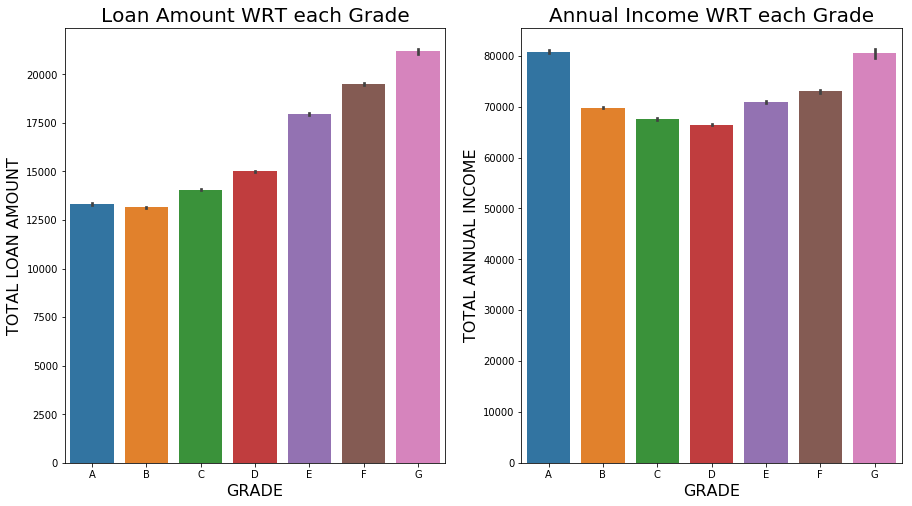

In [25]:
fig,axes = plt.subplots(1,2,figsize=(15,8))

gp =sns.barplot(x='grade', y='loan_amnt', data=train_dataset.sort_values('grade'), ax=axes[0], )
gp.set_title('Loan Amount WRT each Grade', fontsize=20)
gp.set_xlabel('GRADE', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)


gp =sns.barplot(x='grade', y='annual_inc', data=train_dataset.sort_values('grade'),ax=axes[1])
gp.set_title('Annual Income WRT each Grade', fontsize=20)
gp.set_xlabel('GRADE', fontsize=16)
gp.set_ylabel('TOTAL ANNUAL INCOME', fontsize=16)

plt.show()

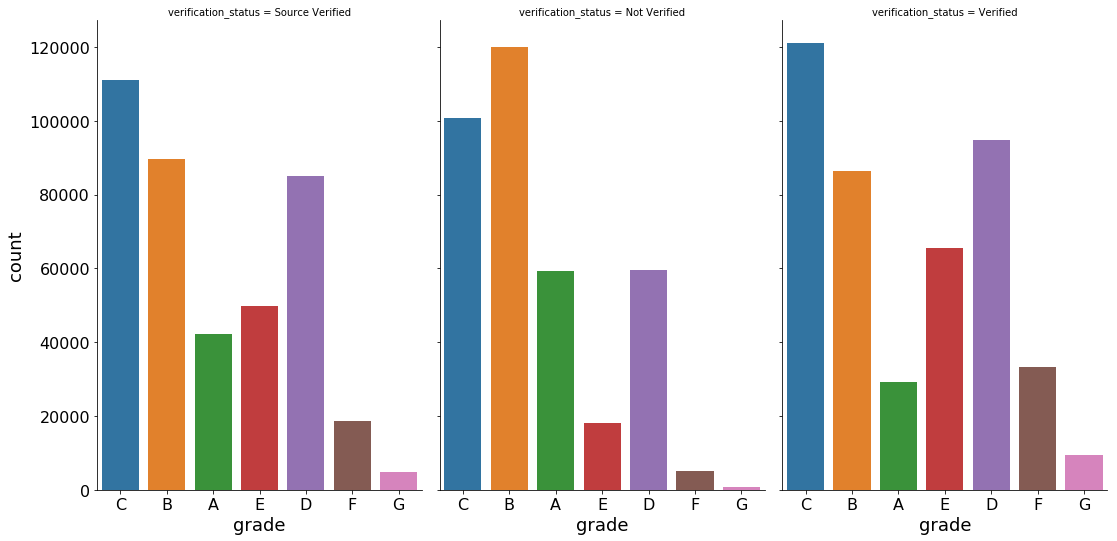

In [28]:
gp = sns.catplot(x='grade', col='verification_status', kind='count', data=train_dataset)
#gp.set_title('Loan Application Count WRT each Grade and Verification of Source', fontsize=20)
#gp.set_xlabel('GRADE', fontsize=16)
#gp.set_ylabel('TOTAL LOAN APPLICATION COUNT', fontsize=16)

gp.fig.set_figwidth(15)
gp.fig.set_figheight(8)
gp.set_xlabels(fontsize=18)
gp.set_ylabels(fontsize=18)
gp.set_xticklabels(fontsize=16)
gp.set_yticklabels(fontsize=16)

plt.show()

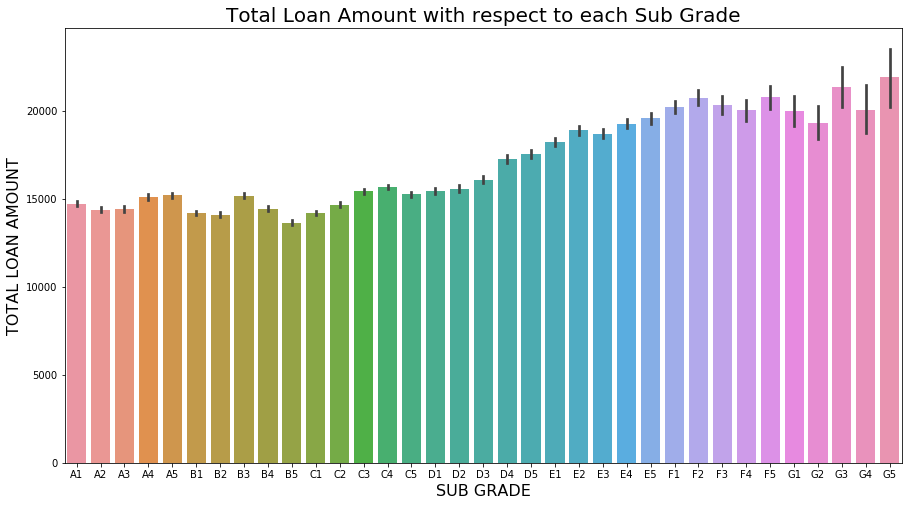

In [21]:
plt.figure(figsize=(15,8))
gp = sns.barplot(x='sub_grade', y='loan_amnt', data=train_dataset.sort_values('sub_grade'))
gp.set_title('Total Loan Amount with respect to each Sub Grade', fontsize=20)
gp.set_xlabel('SUB GRADE', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)

plt.show()

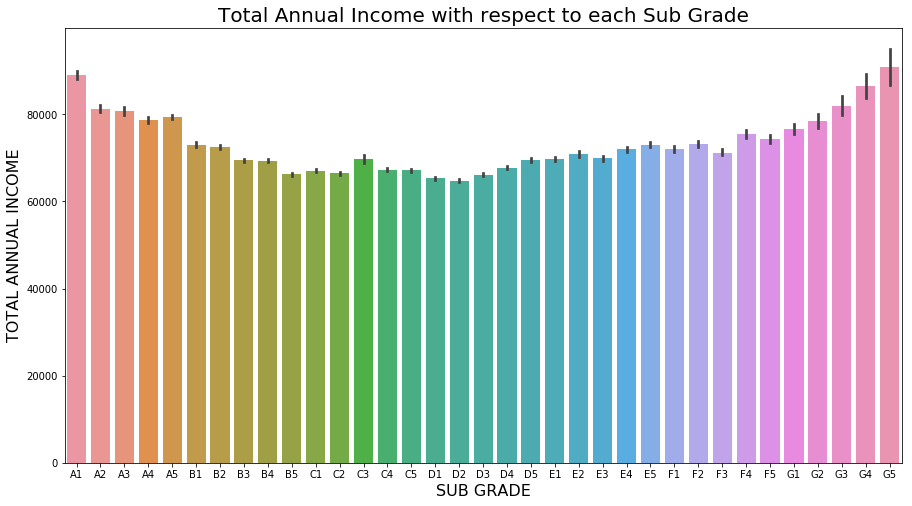

In [29]:
plt.figure(figsize=(15,8))
gp = sns.barplot(x='sub_grade', y='annual_inc', data=train_dataset.sort_values('sub_grade'))
gp.set_title('Total Annual Income with respect to each Sub Grade', fontsize=20)
gp.set_xlabel('SUB GRADE', fontsize=16)
gp.set_ylabel('TOTAL ANNUAL INCOME', fontsize=16)

plt.show()

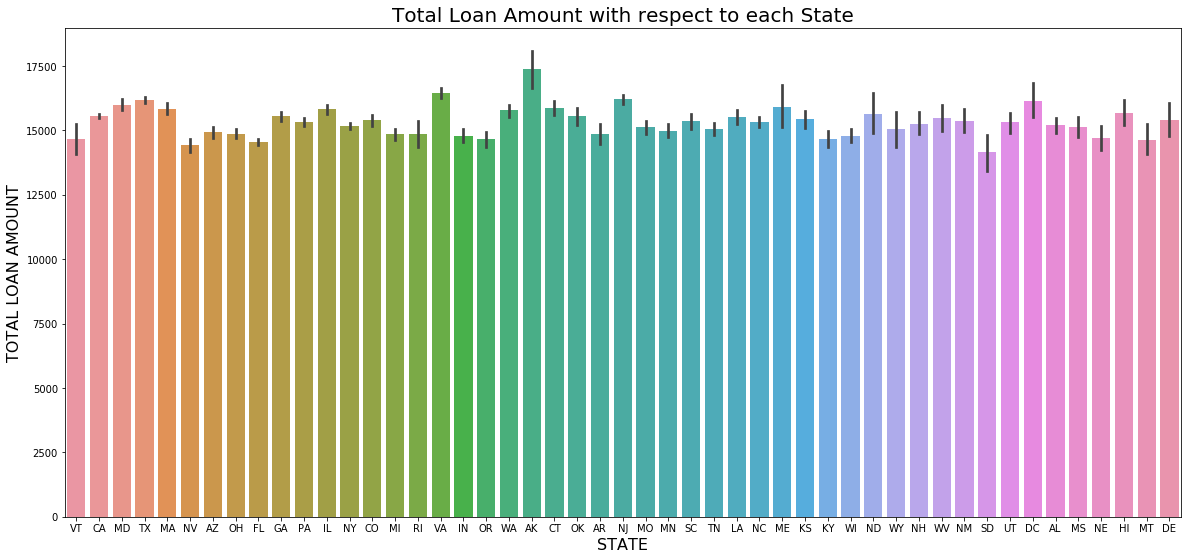

In [22]:
plt.figure(figsize=(20,9))
gp = sns.barplot(x='addr_state', y='loan_amnt', data=train_dataset)
gp.set_title('Total Loan Amount with respect to each State', fontsize=20)
gp.set_xlabel('STATE', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)

plt.show()

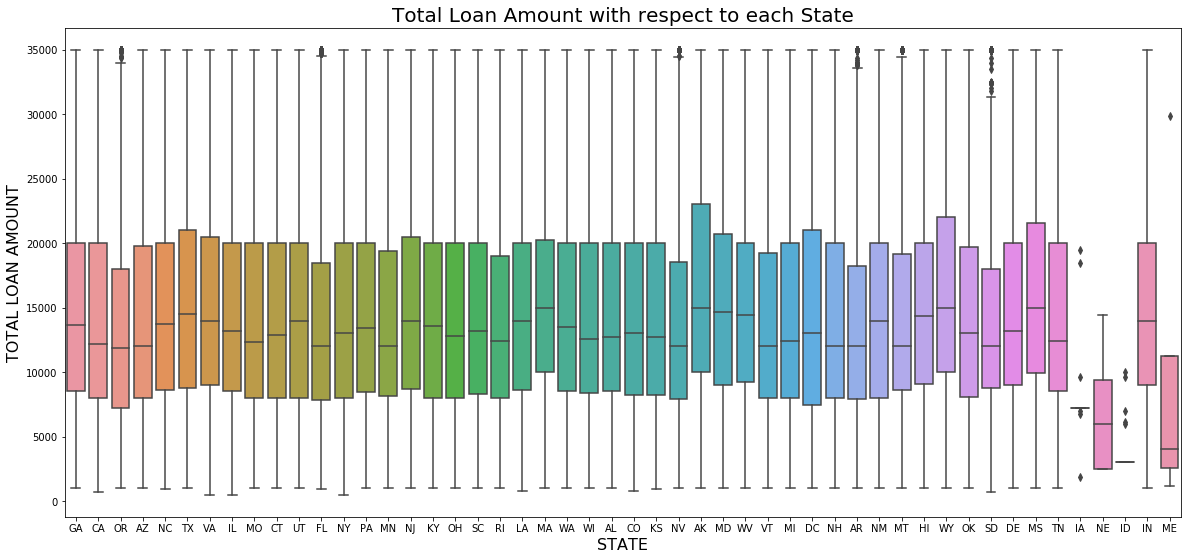

In [35]:
plt.figure(figsize=(20,9))
gp = sns.boxplot(x='addr_state', y='loan_amnt', data=train_dataset)
gp.set_title('Total Loan Amount with respect to each State', fontsize=20)
gp.set_xlabel('STATE', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)

plt.show()

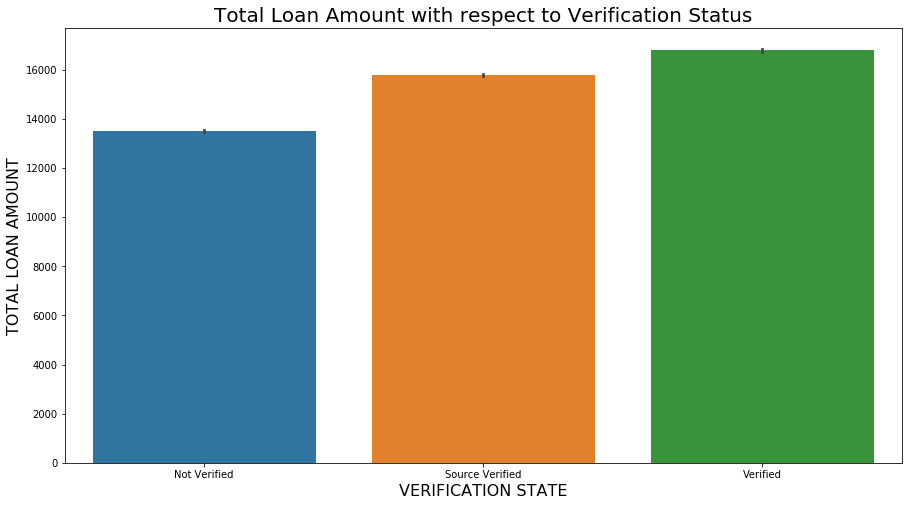

In [23]:
plt.figure(figsize=(15,8))
gp =sns.barplot(x='verification_status', y='loan_amnt', data=train_dataset)
gp.set_title('Total Loan Amount with respect to Verification Status', fontsize=20)
gp.set_xlabel('VERIFICATION STATE', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)

plt.show()

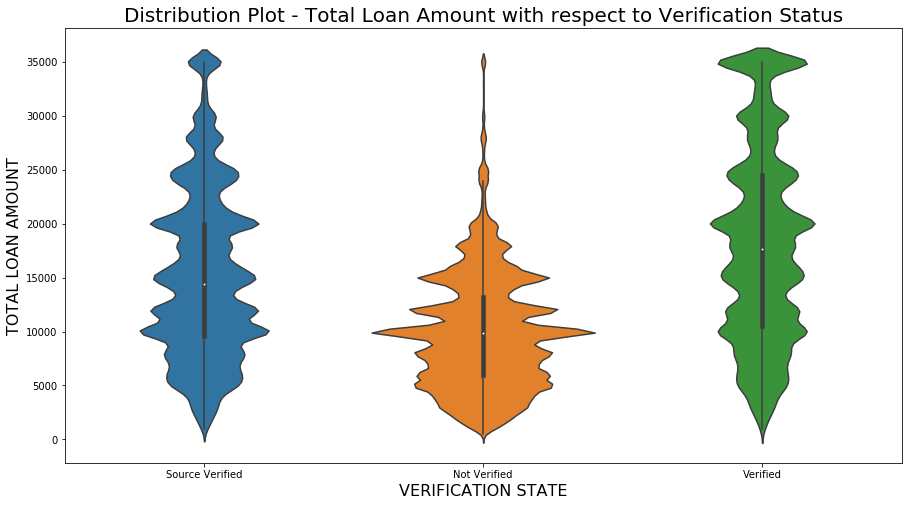

In [31]:
plt.figure(figsize=(15,8))
gp =sns.violinplot(x='verification_status', y='loan_amnt', data=train_dataset)
gp.set_title('Distribution Plot - Total Loan Amount with respect to Verification Status', fontsize=20)
gp.set_xlabel('VERIFICATION STATE', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)

plt.show()

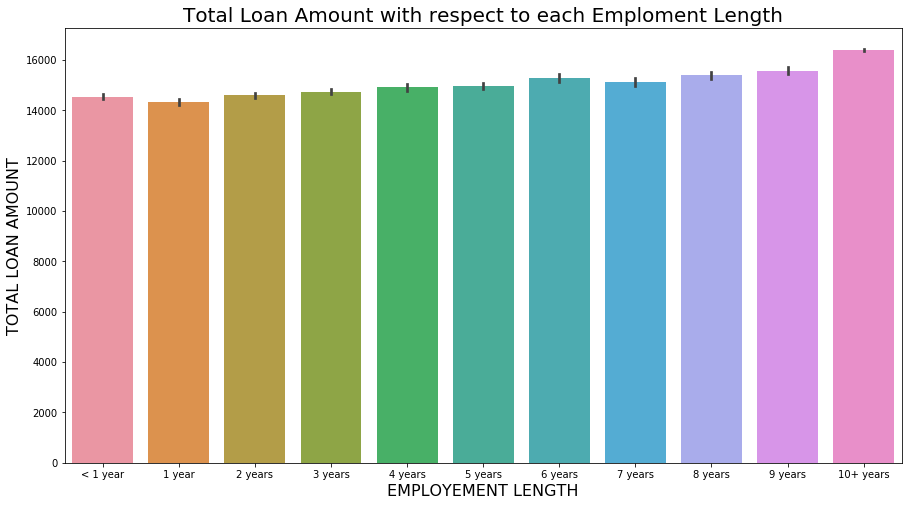

In [24]:
plt.figure(figsize=(15,8))
gp = sns.barplot(data=train_dataset, x='emp_length', y='loan_amnt', order=['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
gp.set_title('Total Loan Amount with respect to each Emploment Length', fontsize=20)
gp.set_xlabel('EMPLOYEMENT LENGTH', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)

plt.show()

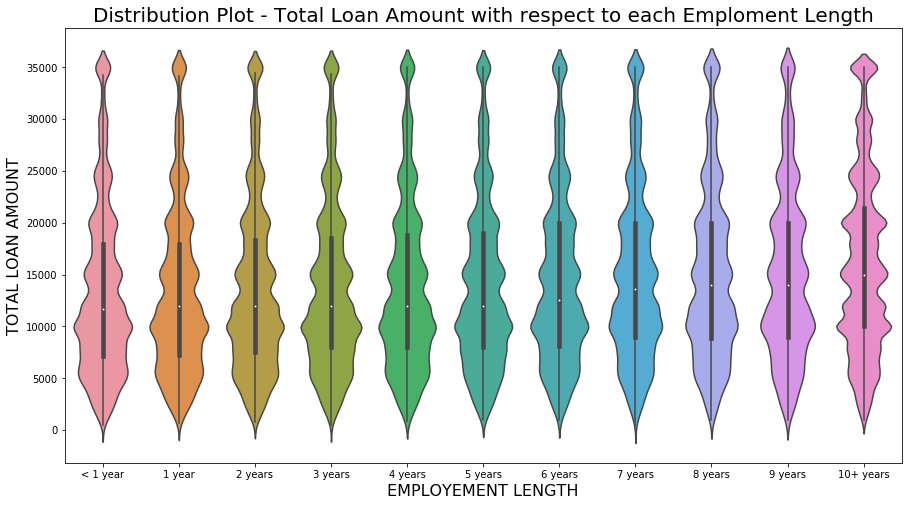

In [36]:
plt.figure(figsize=(15,8))
gp = sns.violinplot(data=train_dataset, x='emp_length', y='loan_amnt', order=['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
gp.set_title('Distribution Plot - Total Loan Amount with respect to each Emploment Length', fontsize=20)
gp.set_xlabel('EMPLOYEMENT LENGTH', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)

plt.show()

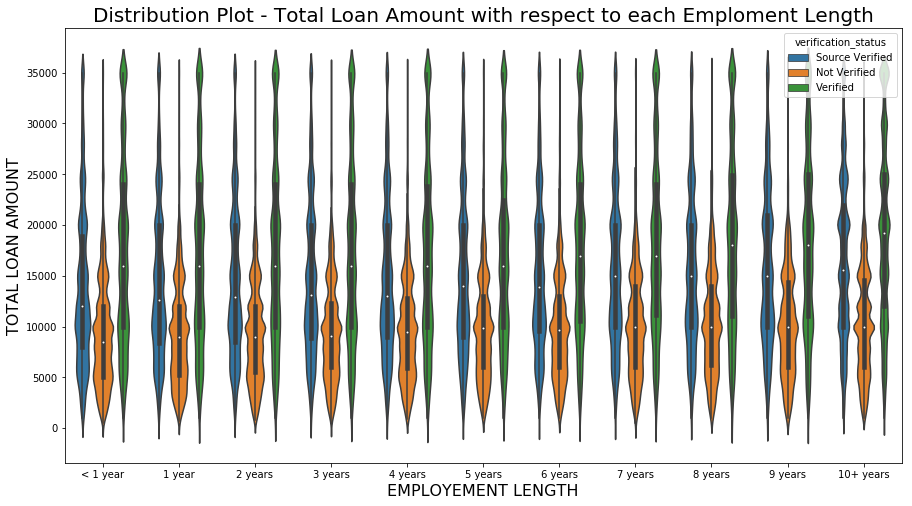

In [37]:
plt.figure(figsize=(15,8))
gp = sns.violinplot(data=train_dataset, x='emp_length', y='loan_amnt', hue='verification_status',order=['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
gp.set_title('Distribution Plot - Total Loan Amount with respect to each Emploment Length', fontsize=20)
gp.set_xlabel('EMPLOYEMENT LENGTH', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)

plt.show()

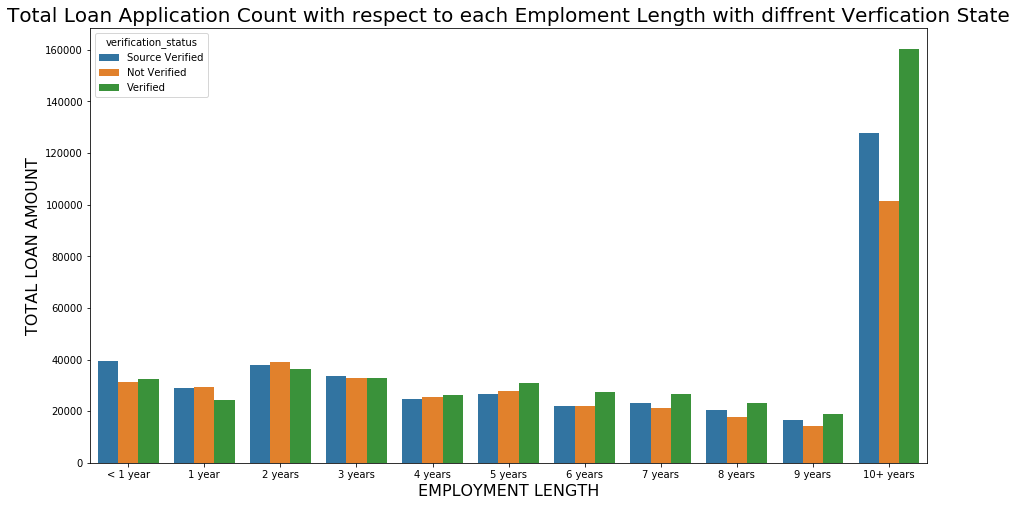

In [38]:
plt.figure(figsize=(15,8))
gp =sns.countplot(data=train_dataset, x='emp_length', hue='verification_status', order=['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
gp.set_title('Total Loan Application Count with respect to each Emploment Length with diffrent Verfication State', fontsize=20)
gp.set_xlabel('EMPLOYMENT LENGTH', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)

plt.show()

Grade vidse Verification on Employment Year


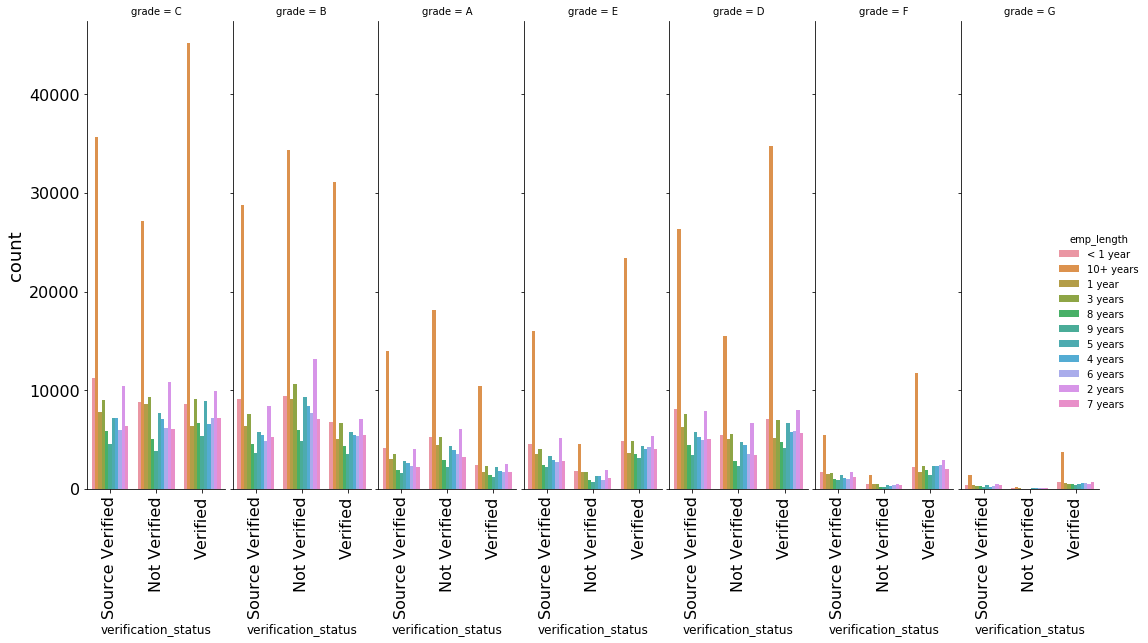

In [39]:
print('Grade vidse Verification on Employment Year')
gp = sns.catplot(col='grade', x='verification_status', hue='emp_length', kind='count',data=train_dataset)
gp.fig.set_figwidth(15)
gp.fig.set_figheight(8)
gp.set_xlabels(fontsize=12)
gp.set_ylabels(fontsize=18)
gp.set_xticklabels(fontsize=16, rotation=90)
gp.set_yticklabels(fontsize=16)
plt.show()

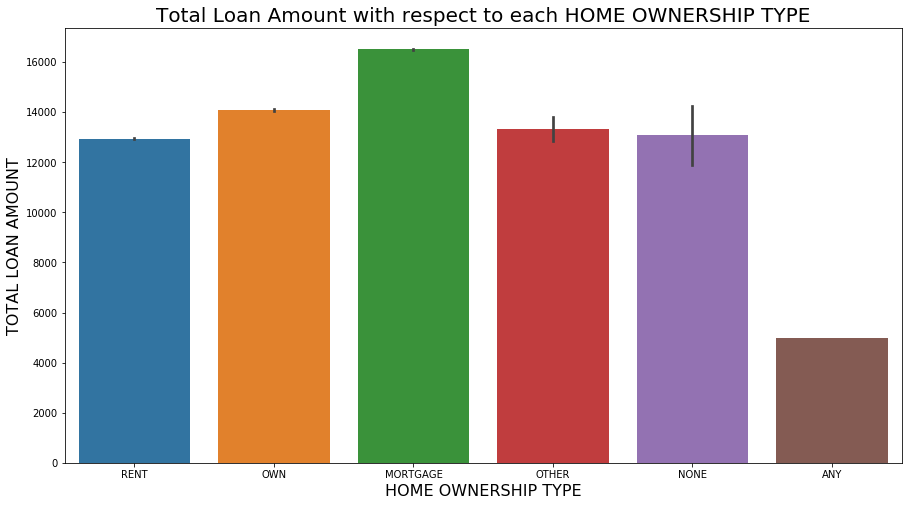

In [40]:
plt.figure(figsize=(15,8))
gp = sns.barplot(x='home_ownership', y='loan_amnt', data=train_dataset)
gp.set_title('Total Loan Amount with respect to each HOME OWNERSHIP TYPE', fontsize=20)
gp.set_xlabel('HOME OWNERSHIP TYPE', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)

plt.show()

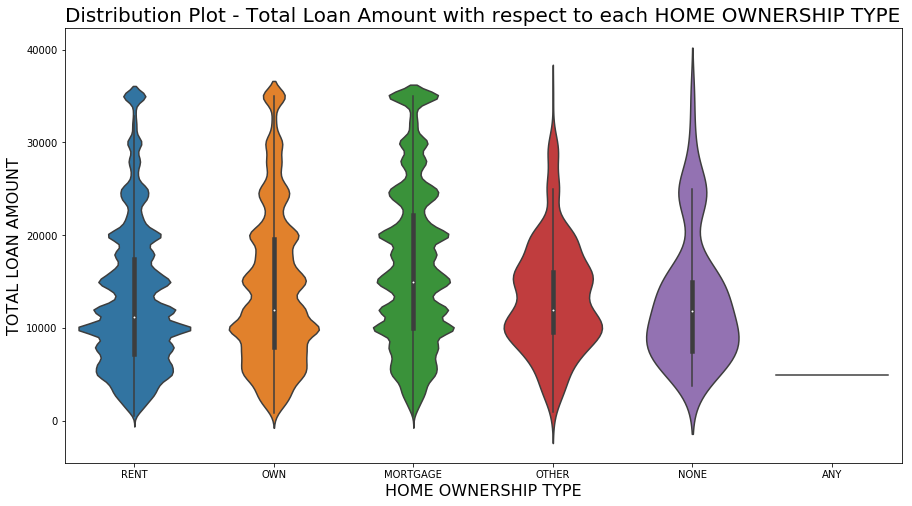

In [44]:
plt.figure(figsize=(15,8))
gp = sns.violinplot(x='home_ownership', y='loan_amnt', data=train_dataset)
gp.set_title('Distribution Plot - Total Loan Amount with respect to each HOME OWNERSHIP TYPE', fontsize=20)
gp.set_xlabel('HOME OWNERSHIP TYPE', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)

plt.show()

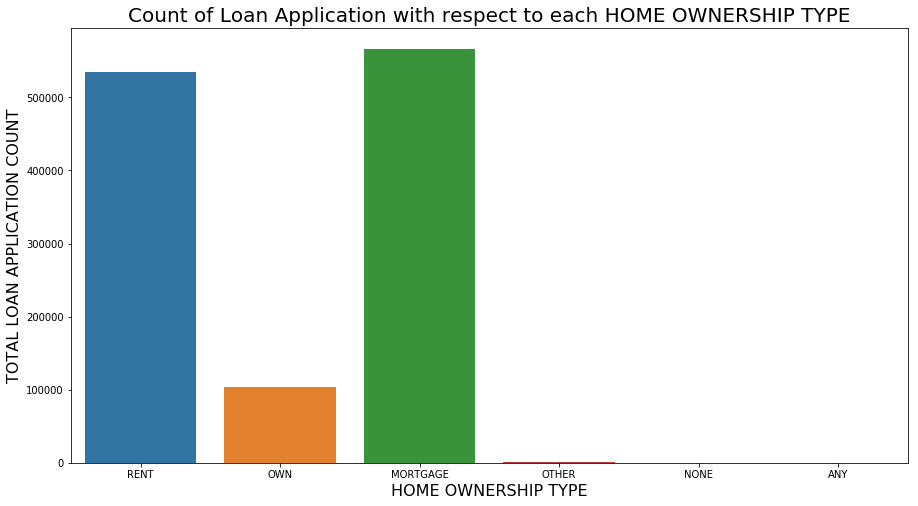

In [46]:
plt.figure(figsize=(15,8))
gp = sns.countplot(x='home_ownership', data=train_dataset)
gp.set_title('Count of Loan Application with respect to each HOME OWNERSHIP TYPE', fontsize=20)
gp.set_xlabel('HOME OWNERSHIP TYPE', fontsize=16)
gp.set_ylabel('TOTAL LOAN APPLICATION COUNT', fontsize=16)

plt.show()

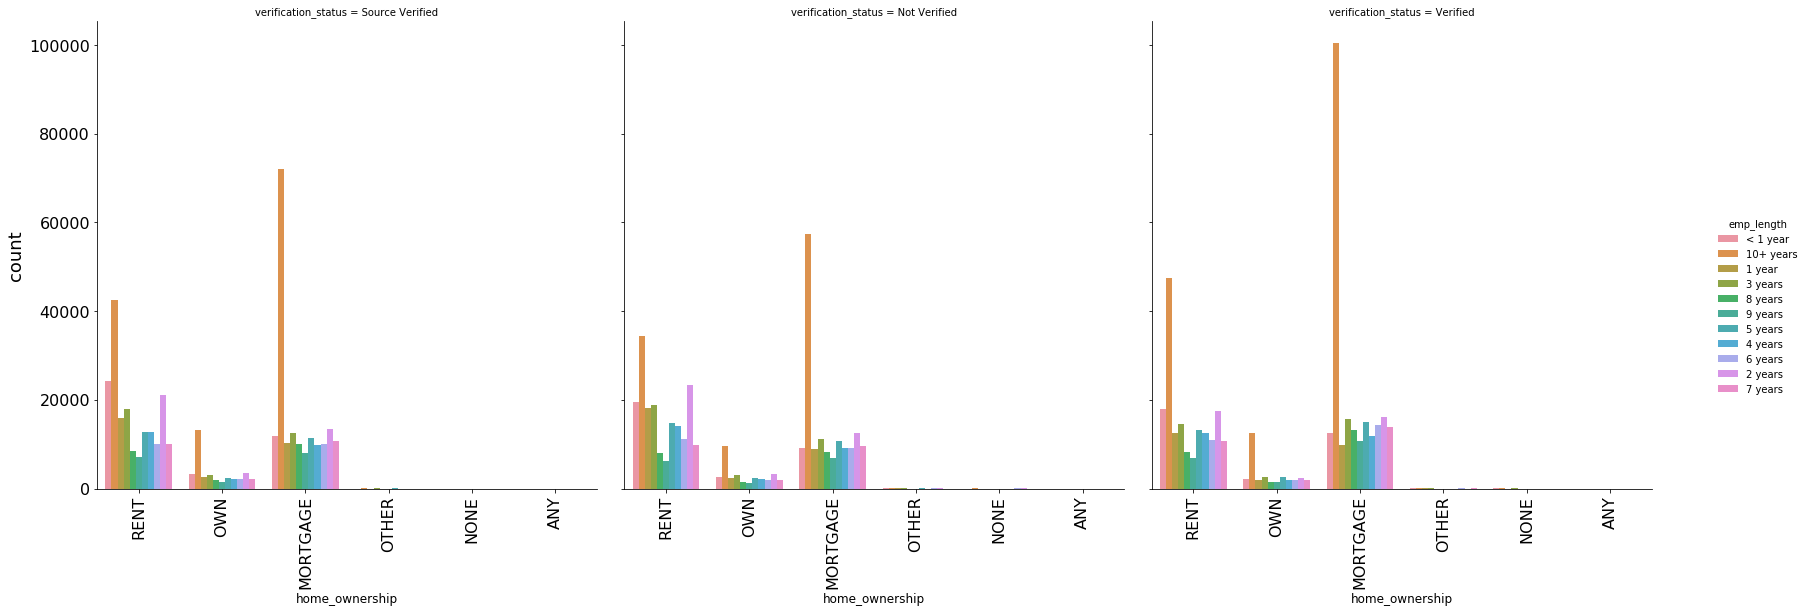

In [47]:
gp = sns.catplot(x='home_ownership', col='verification_status', hue='emp_length', kind='count',data=train_dataset)
gp.fig.set_figwidth(25)
gp.fig.set_figheight(8)
gp.set_xlabels(fontsize=12)
gp.set_ylabels(fontsize=18)
gp.set_xticklabels(fontsize=16, rotation=90)
gp.set_yticklabels(fontsize=16)
plt.show()

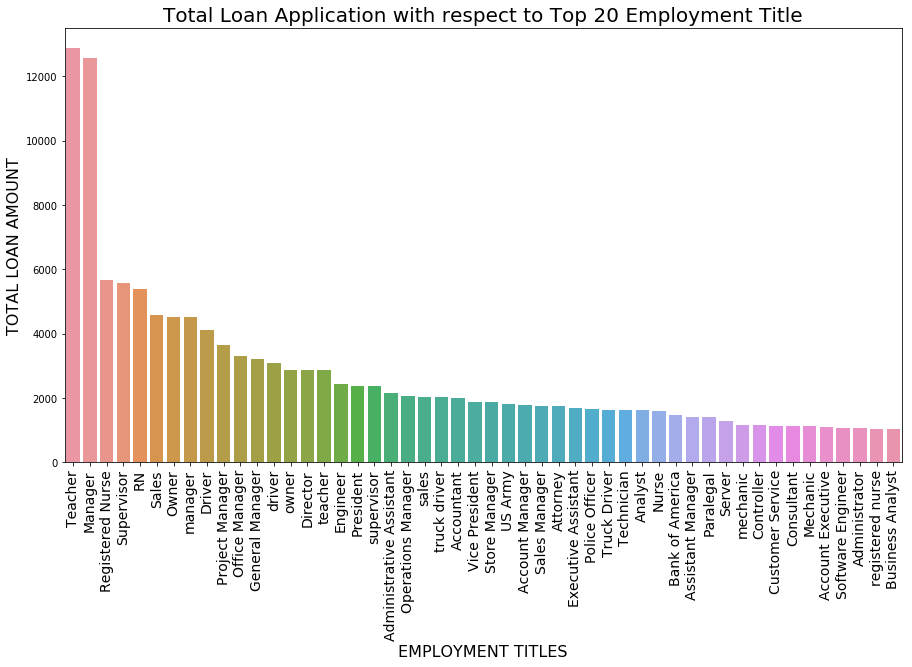

In [48]:
plt.figure(figsize=(15,8))
top_emp_titles = train_dataset['emp_title'].value_counts()[0:50]
gp = sns.barplot(top_emp_titles.index, top_emp_titles.values)
gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
gp.set_title('Total Loan Application with respect to Top 20 Employment Title', fontsize=20)
gp.set_xlabel('EMPLOYMENT TITLES', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)


plt.show()

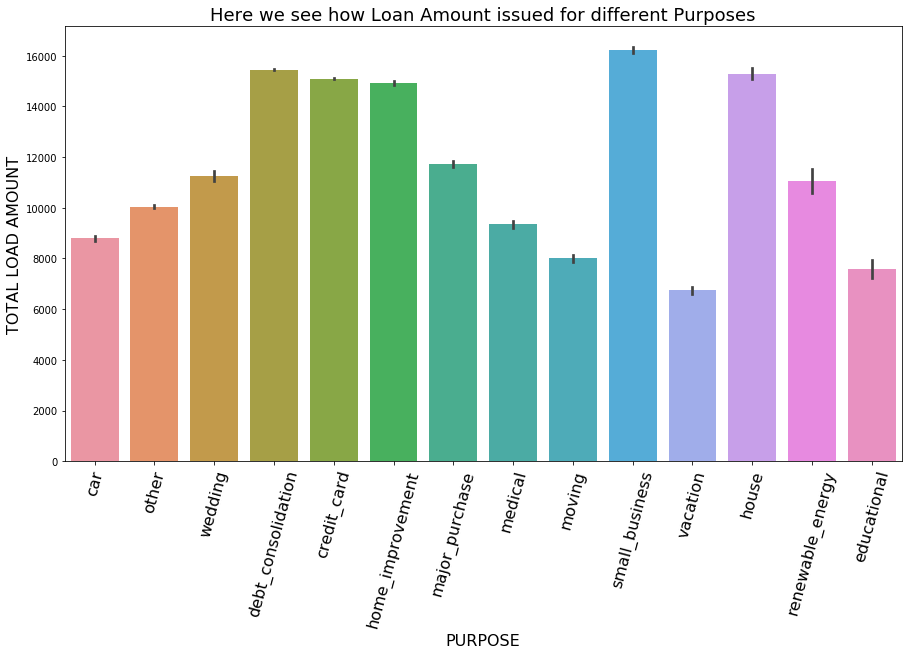

In [49]:
plt.figure(figsize=(15,8))
gp = sns.barplot(x='purpose', y='loan_amnt', data=train_dataset)
gp.set_xticklabels(gp.get_xticklabels(), rotation=75, fontsize=16)
gp.set_title('Here we see how Loan Amount issued for different Purposes', fontsize=18)
gp.set_xlabel('PURPOSE', fontsize=16)
gp.set_ylabel('TOTAL LOAD AMOUNT', fontsize=16)
plt.show()

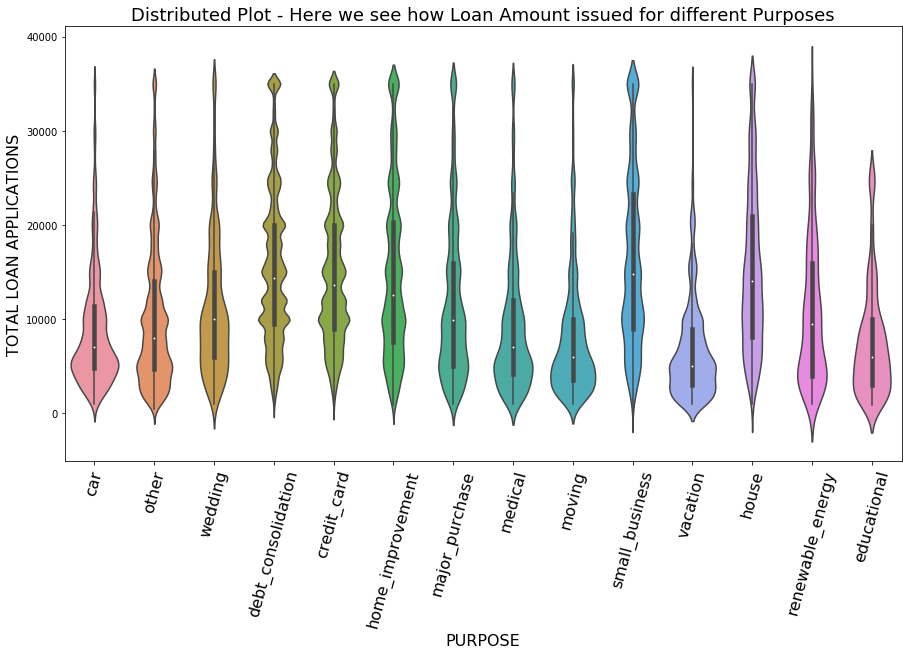

In [51]:
plt.figure(figsize=(15,8))
gp = sns.violinplot(x='purpose', y='loan_amnt', data=train_dataset)
gp.set_xticklabels(gp.get_xticklabels(), rotation=75, fontsize=16)
gp.set_title('Distributed Plot - Here we see how Loan Amount issued for different Purposes', fontsize=18)
gp.set_xlabel('PURPOSE', fontsize=16)
gp.set_ylabel('TOTAL LOAN APPLICATIONS', fontsize=16)
plt.show()

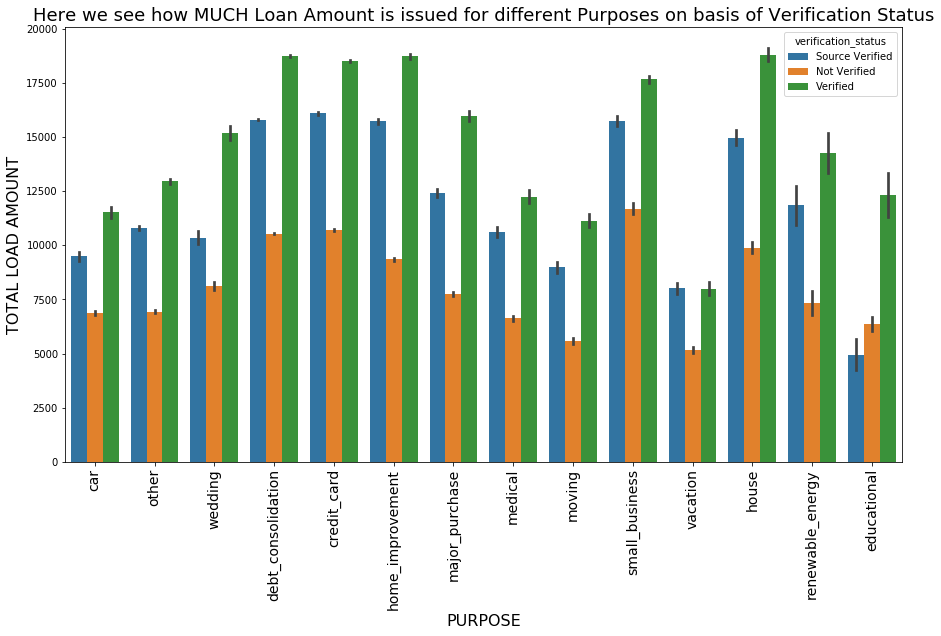

In [52]:
plt.figure(figsize=(15,8))
gp=sns.barplot(x='purpose', y='loan_amnt', hue='verification_status', data=train_dataset)
gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
gp.set_title('Here we see how MUCH Loan Amount is issued for different Purposes on basis of Verification Status', fontsize=18)
gp.set_xlabel('PURPOSE', fontsize=16)
gp.set_ylabel('TOTAL LOAD AMOUNT', fontsize=16)
plt.show()

<Figure size 1080x576 with 0 Axes>

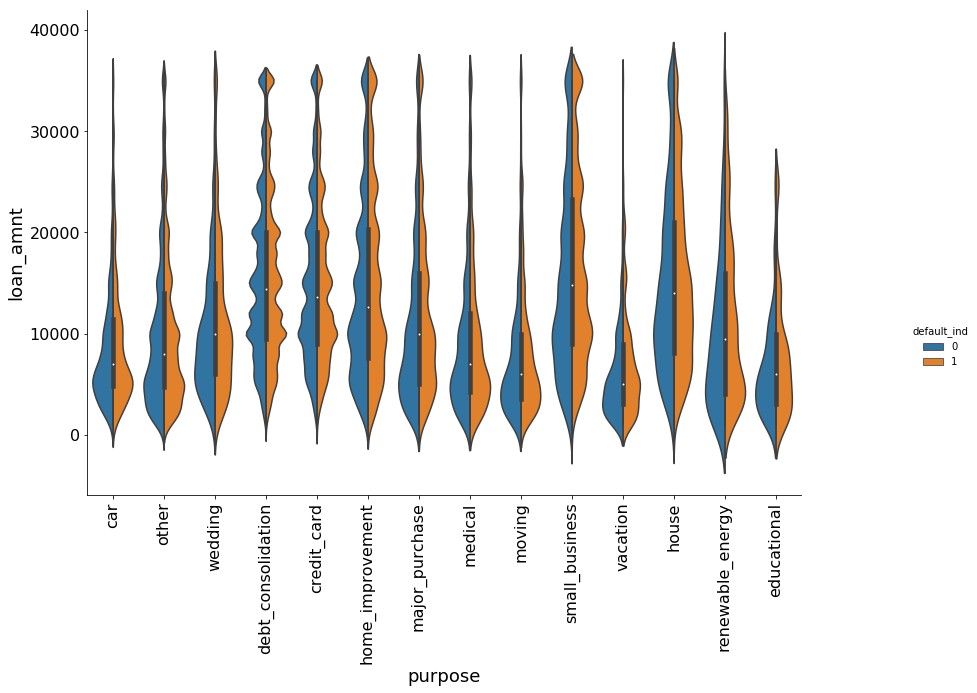

In [62]:
plt.figure(figsize=(15,8))
gp=sns.catplot(x='purpose', y='loan_amnt', hue='default_ind', kind="violin", split=True, data=train_dataset)
#gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
#gp.set_title('Here we see how MUCH Loan Amount is issued for different Purposes on basis of Defaulter', fontsize=18)
#gp.set_xlabel('PURPOSE', fontsize=16)
#gp.set_ylabel('TOTAL LOAD AMOUNT', fontsize=16)

gp.fig.set_figwidth(15)
gp.fig.set_figheight(8)
gp.set_xlabels(fontsize=18)
gp.set_ylabels(fontsize=18)
gp.set_xticklabels(fontsize=16, rotation=90)
gp.set_yticklabels(fontsize=16)
plt.show()

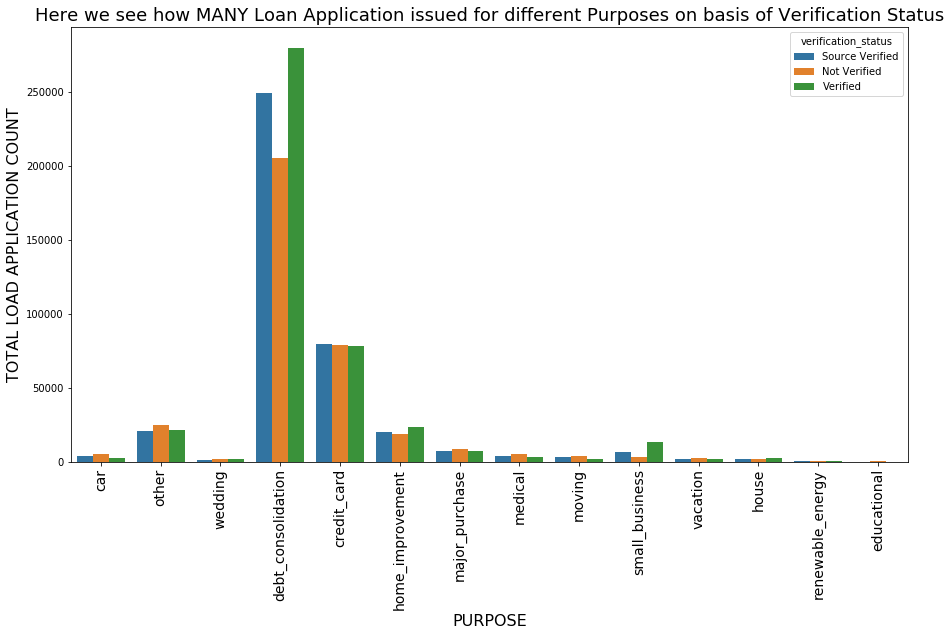

In [63]:
plt.figure(figsize=(15,8))
gp=sns.countplot(x='purpose', hue='verification_status', data=train_dataset)
gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
gp.set_title('Here we see how MANY Loan Application issued for different Purposes on basis of Verification Status', fontsize=18)
gp.set_xlabel('PURPOSE', fontsize=16)
gp.set_ylabel('TOTAL LOAD APPLICATION COUNT', fontsize=16)
plt.show()

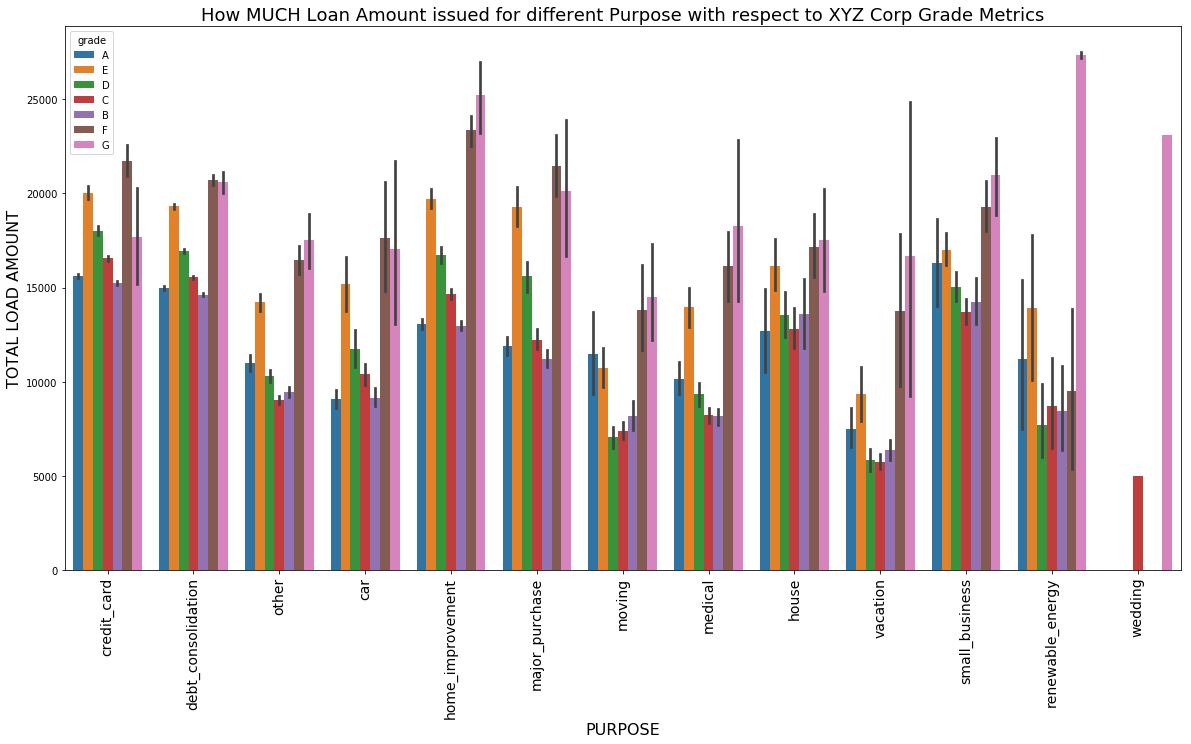

In [32]:
plt.figure(figsize=(20,10))
gp = sns.barplot(x='purpose', y='loan_amnt', hue='grade',data=train_dataset)
gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
gp.set_title('How MUCH Loan Amount issued for different Purpose with respect to XYZ Corp Grade Metrics', fontsize=18)
gp.set_xlabel('PURPOSE', fontsize=16)
gp.set_ylabel('TOTAL LOAD AMOUNT', fontsize=16)
plt.show()

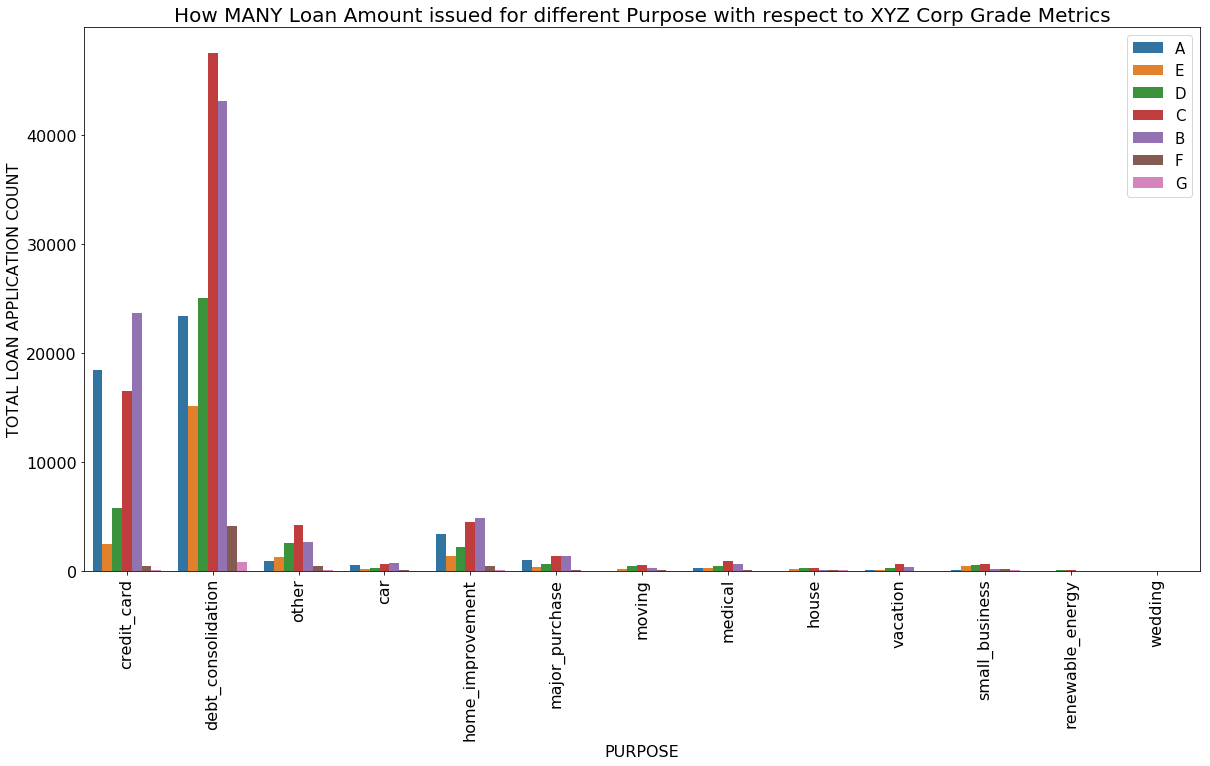

In [33]:
plt.figure(figsize=(20,10))
gp = sns.countplot(x='purpose', hue='grade',data=train_dataset)
gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=16)
gp.set_title('How MANY Loan Amount issued for different Purpose with respect to XYZ Corp Grade Metrics', fontsize=20)
gp.set_xlabel('PURPOSE', fontsize=16)
gp.set_ylabel('TOTAL LOAN APPLICATION COUNT', fontsize=16)
plt.legend(loc='upper right', fontsize=15)
plt.yticks(fontsize=16)
plt.show()

In [65]:
top_emp_titles = train_dataset['emp_title'].value_counts()[0:10]
top_emp_title_load_data = train_dataset[train_dataset['emp_title'].apply(lambda x: x in top_emp_titles.index)]

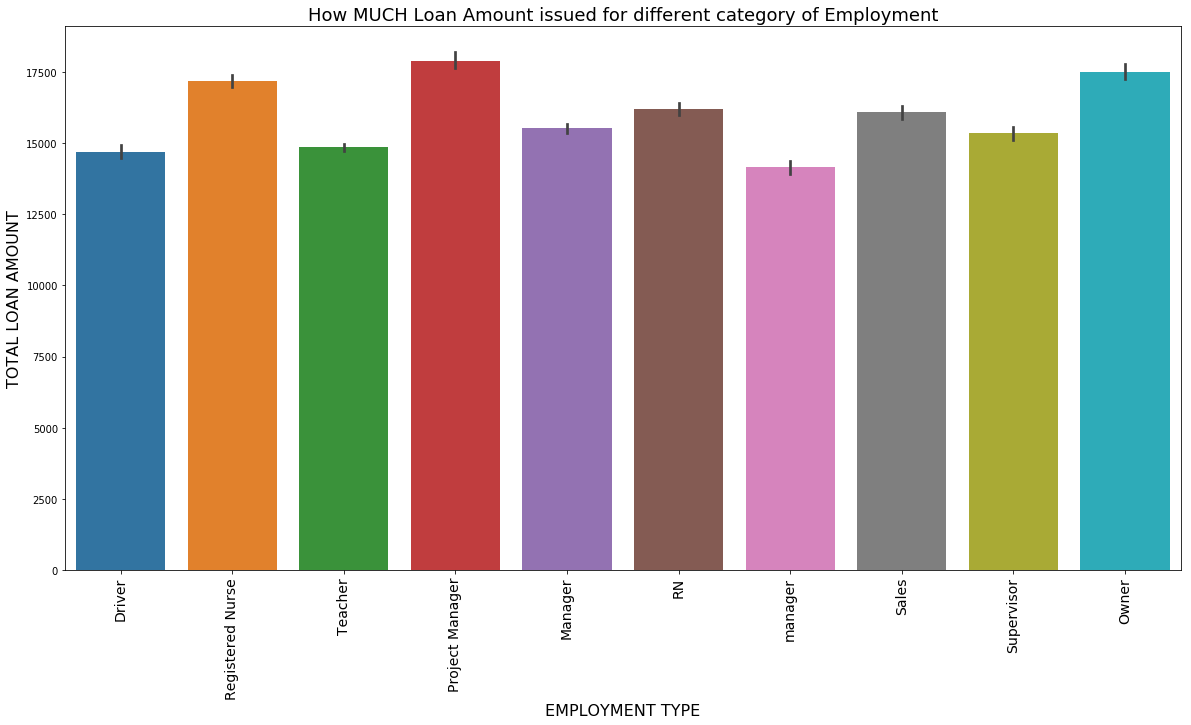

In [66]:
plt.figure(figsize=(20,10))
gp = sns.barplot(x='emp_title', y='loan_amnt',data=top_emp_title_load_data)
gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
gp.set_title('How MUCH Loan Amount issued for different category of Employment', fontsize=18)
gp.set_xlabel('EMPLOYMENT TYPE', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)
plt.show()

How MUCH Loan Amount issued for different category of Employment


<Figure size 1440x720 with 0 Axes>

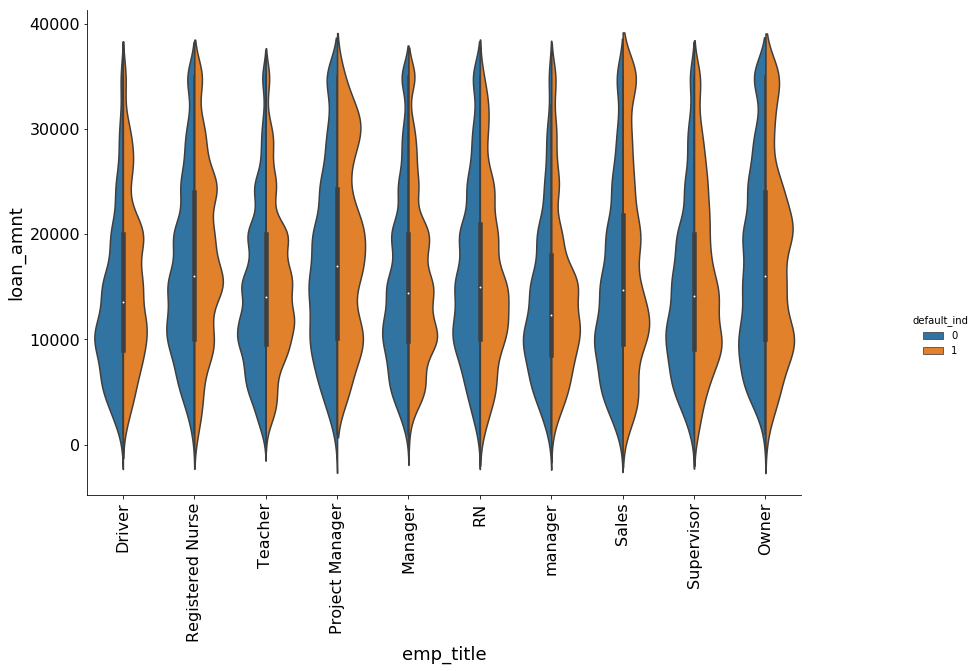

In [71]:
plt.figure(figsize=(20,10))
gp = sns.catplot(x='emp_title', y='loan_amnt', hue='default_ind', split=True, kind='violin', data=top_emp_title_load_data)
#gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
#gp.set_title('How MUCH Loan Amount issued for different category of Employment', fontsize=18)
#gp.set_xlabel('EMPLOYMENT TYPE', fontsize=16)
#gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)
gp.fig.set_figwidth(15)
gp.fig.set_figheight(8)
gp.set_xlabels(fontsize=18)
gp.set_ylabels(fontsize=18)
gp.set_xticklabels(fontsize=16, rotation=90)
gp.set_yticklabels(fontsize=16)
print('How MUCH Loan Amount issued for different category of Employment')
plt.show()

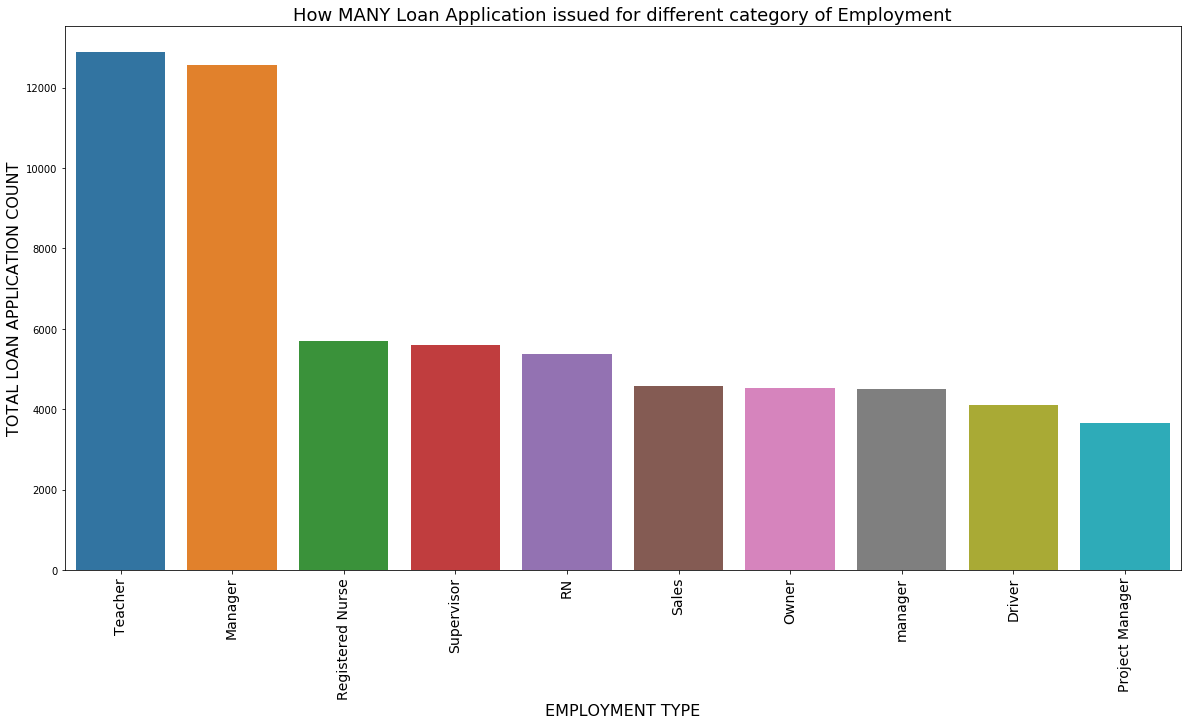

In [68]:
plt.figure(figsize=(20,10))
gp = sns.countplot(x='emp_title',data=top_emp_title_load_data, order=top_emp_titles.index)
gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
gp.set_title('How MANY Loan Application issued for different category of Employment', fontsize=18)
gp.set_xlabel('EMPLOYMENT TYPE', fontsize=16)
gp.set_ylabel('TOTAL LOAN APPLICATION COUNT', fontsize=16)
plt.show()

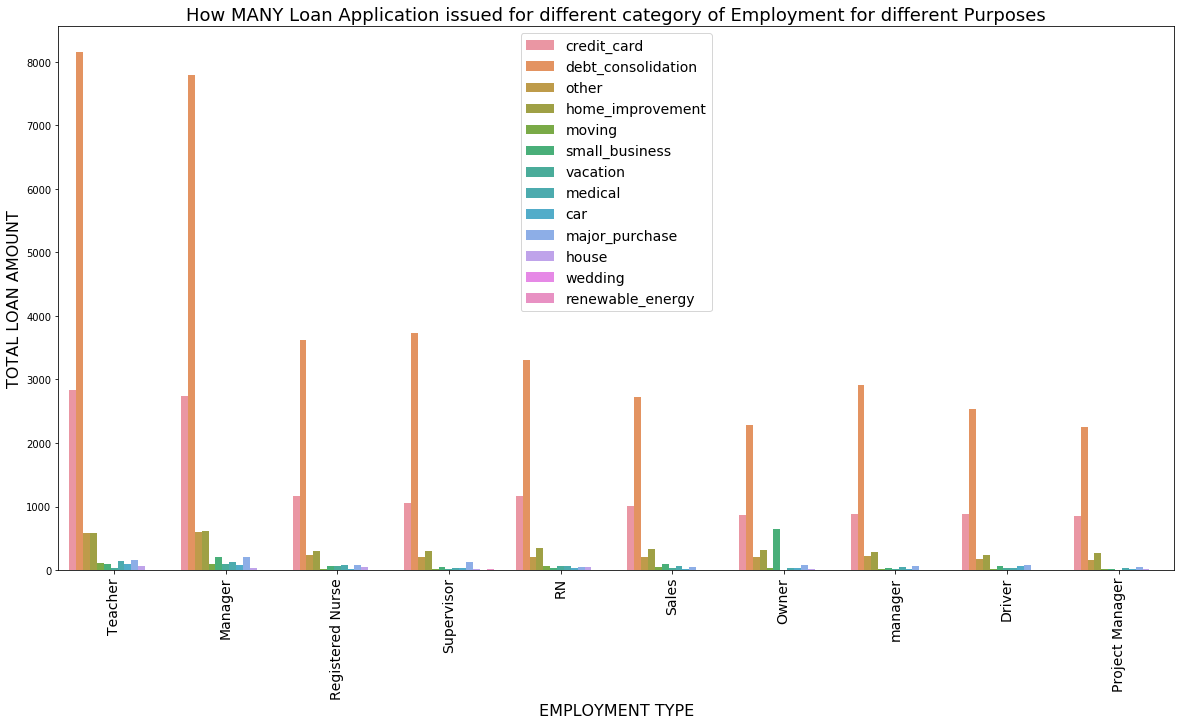

In [69]:
plt.figure(figsize=(20,10))
gp = sns.countplot(x='emp_title',hue='purpose', data=top_emp_title_load_data, order=top_emp_titles.index)
gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
gp.set_title('How MANY Loan Application issued for different category of Employment for different Purposes', fontsize=18)
gp.set_xlabel('EMPLOYMENT TYPE', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)
plt.legend(fontsize=14)
plt.show()

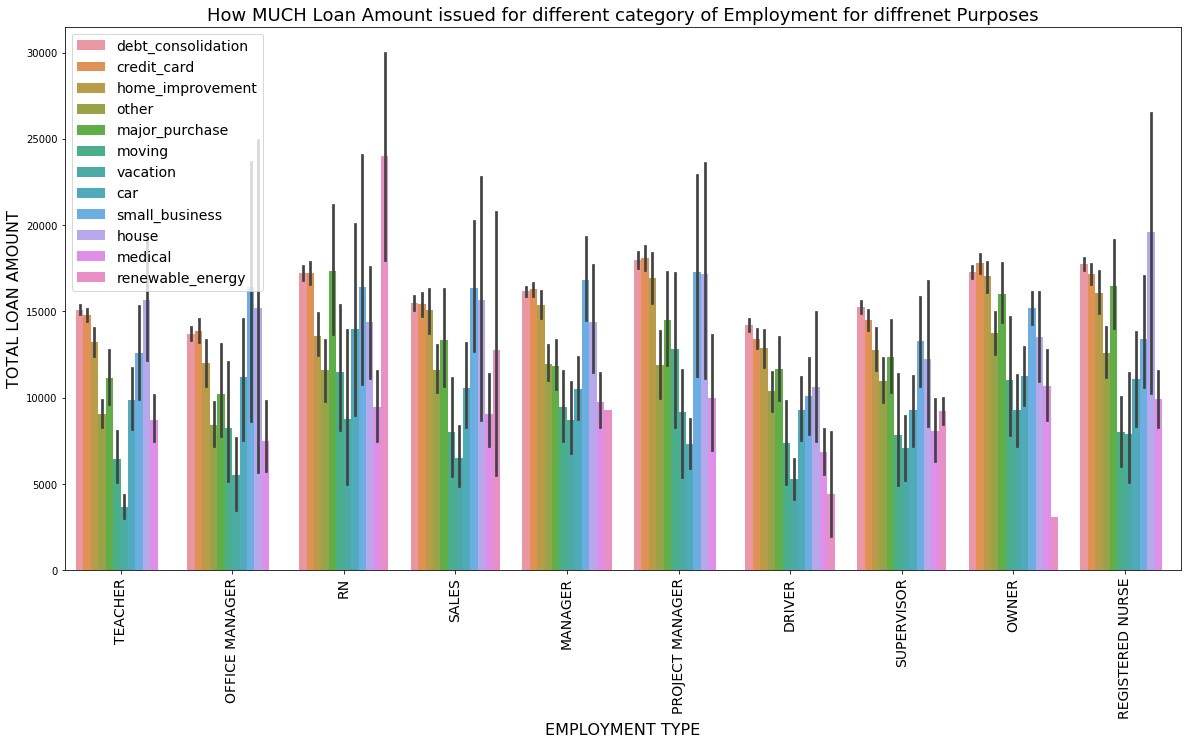

In [38]:
plt.figure(figsize=(20,10))
gp = sns.barplot(x='emp_title', y='loan_amnt',hue='purpose', data=top_emp_title_load_data)
gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
gp.set_title('How MUCH Loan Amount issued for different category of Employment for diffrenet Purposes', fontsize=18)
gp.set_xlabel('EMPLOYMENT TYPE', fontsize=16)
gp.set_ylabel('TOTAL LOAN AMOUNT', fontsize=16)
plt.legend(fontsize=14)
plt.show()

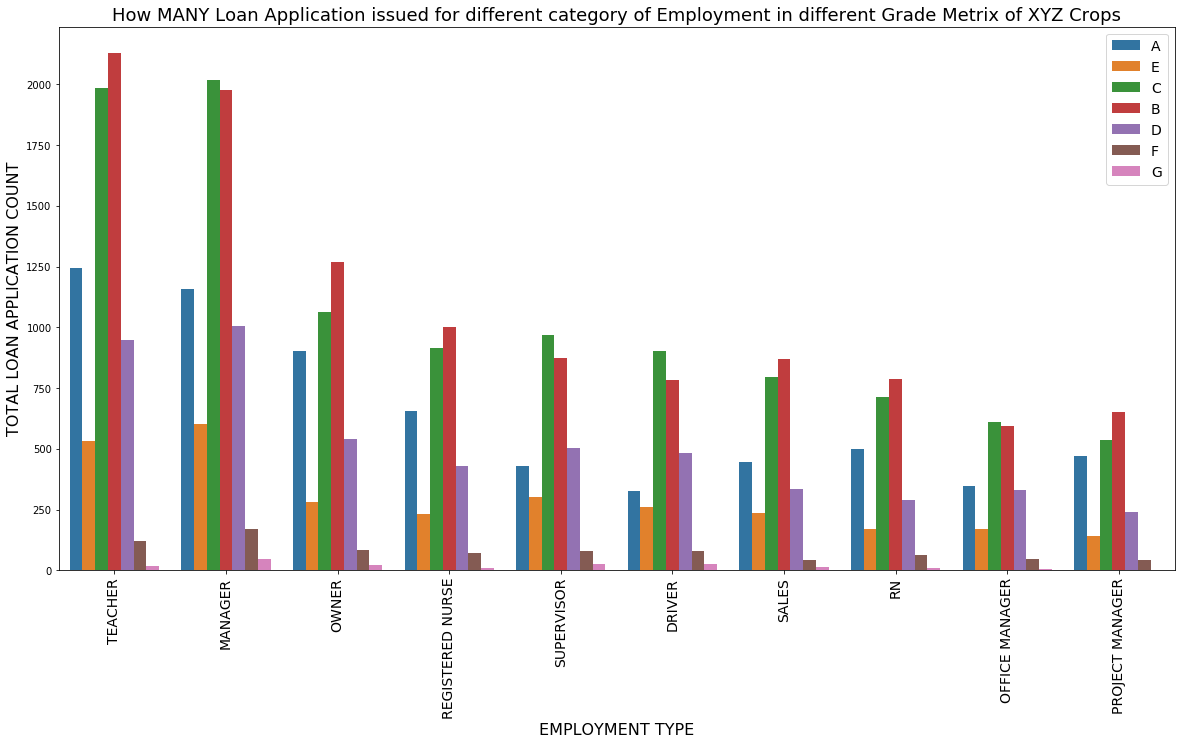

In [39]:
plt.figure(figsize=(20,10))
gp = sns.countplot(x='emp_title',hue='grade', data=top_emp_title_load_data, order=top_emp_titles.index)
gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
gp.set_title('How MANY Loan Application issued for different category of Employment in different Grade Metrix of XYZ Crops', fontsize=18)
gp.set_xlabel('EMPLOYMENT TYPE', fontsize=16)
gp.set_ylabel('TOTAL LOAN APPLICATION COUNT', fontsize=16)
plt.legend(fontsize=14)
plt.show()

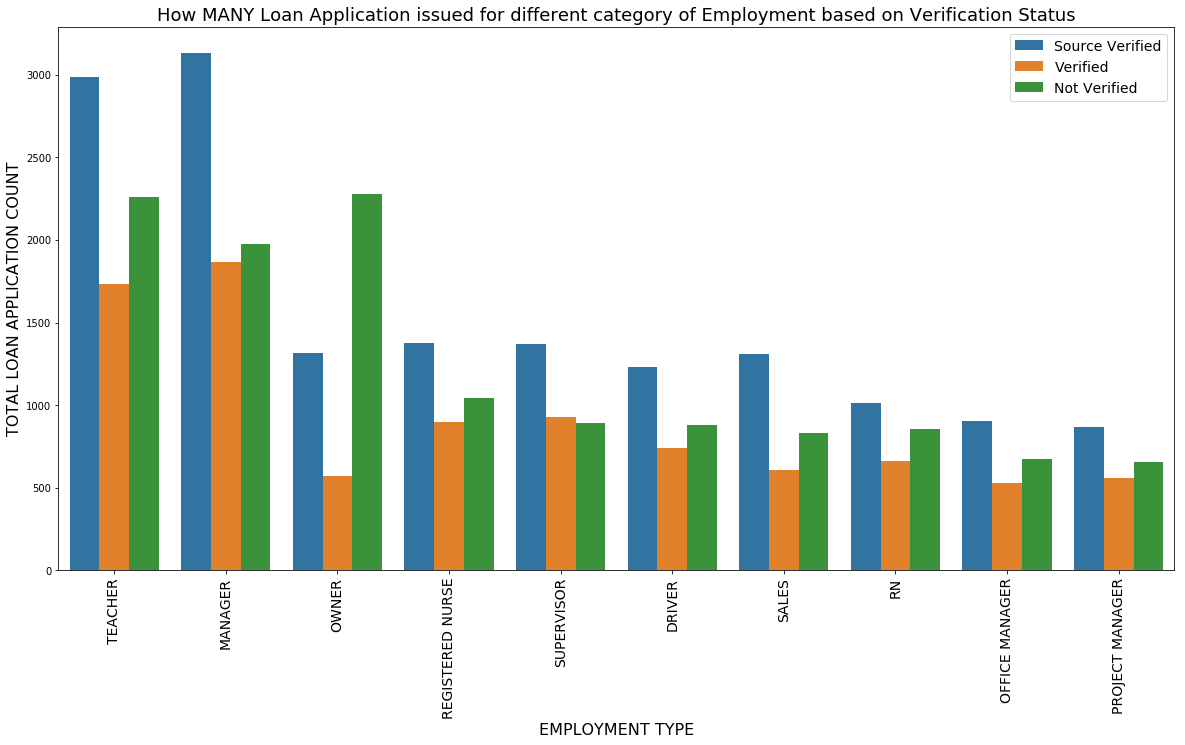

In [40]:
plt.figure(figsize=(20,10))
gp = sns.countplot(x='emp_title',hue='verification_status', data=top_emp_title_load_data, order=top_emp_titles.index)
gp.set_xticklabels(gp.get_xticklabels(), rotation=90, fontsize=14)
gp.set_title('How MANY Loan Application issued for different category of Employment based on Verification Status', fontsize=18)
gp.set_xlabel('EMPLOYMENT TYPE', fontsize=16)
gp.set_ylabel('TOTAL LOAN APPLICATION COUNT', fontsize=16)
plt.legend(fontsize=14)
plt.show()

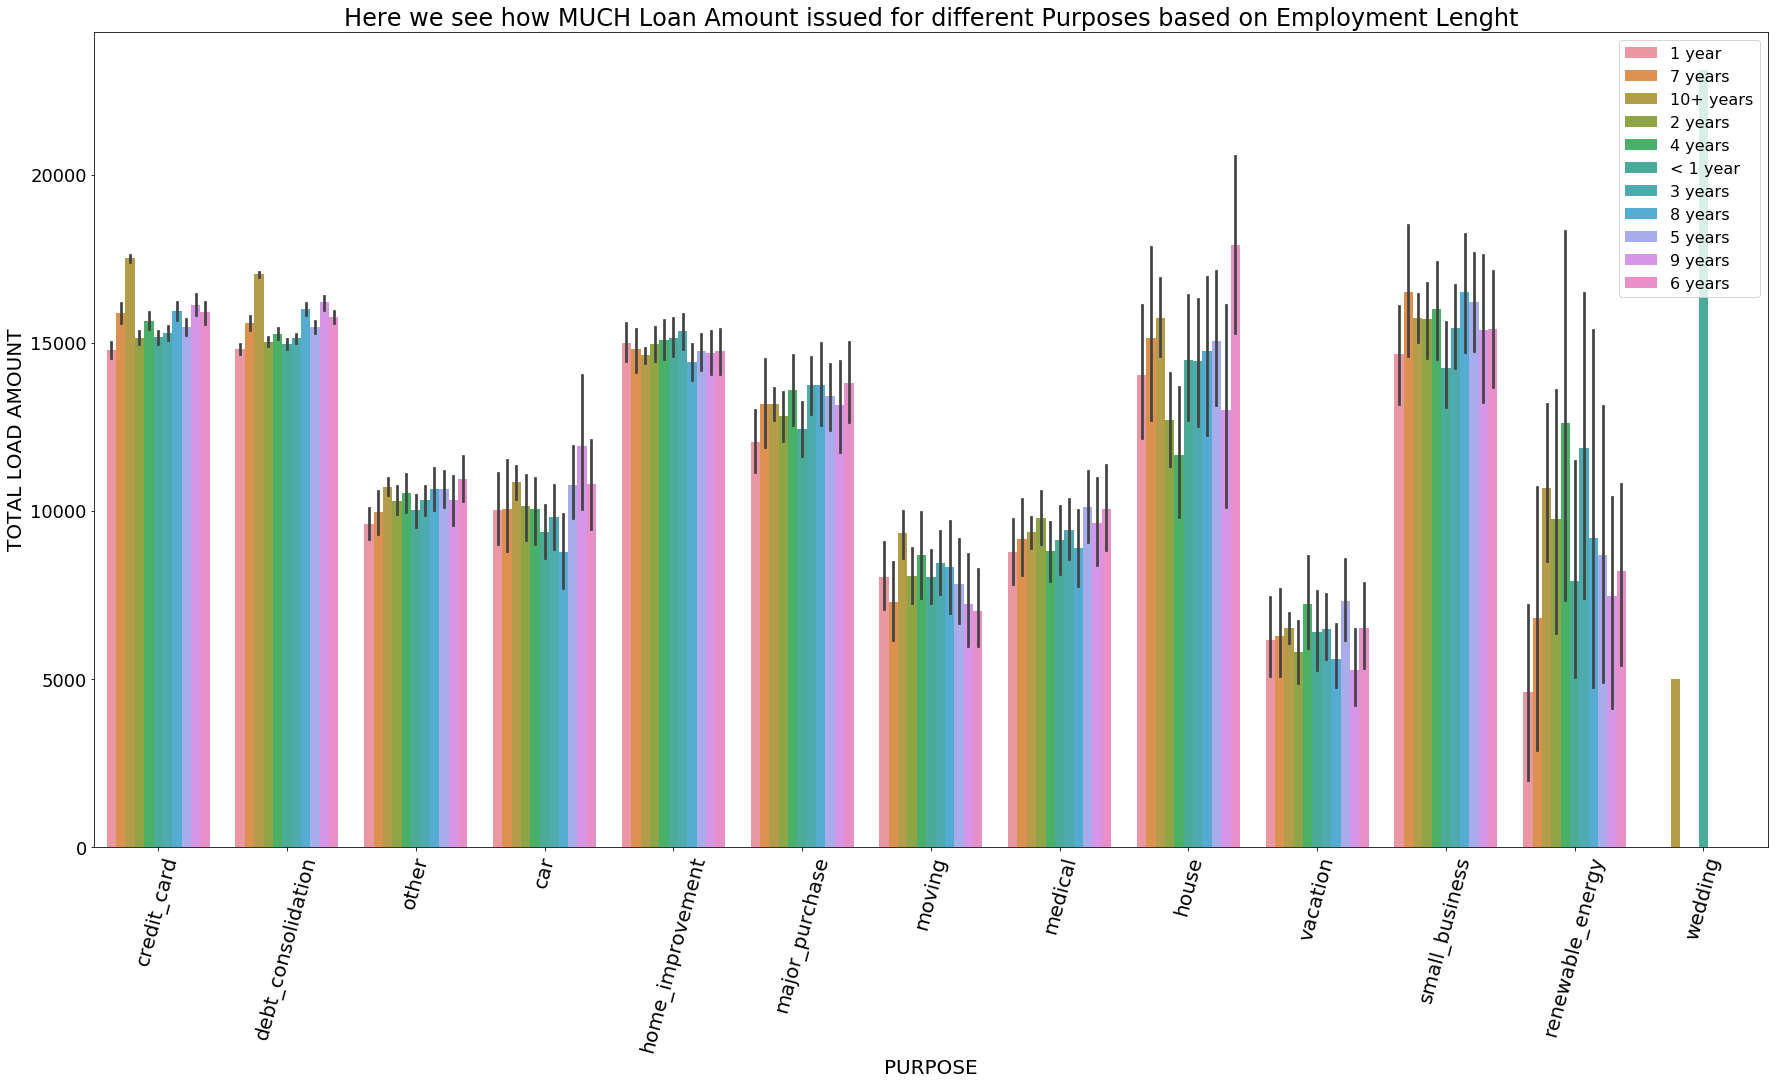

In [41]:
plt.figure(figsize=(30,15))
gp = sns.barplot(x='purpose', y='loan_amnt', hue='emp_length',data=train_dataset)
gp.set_xticklabels(gp.get_xticklabels(), rotation=75, fontsize=20)
gp.set_title('Here we see how MUCH Loan Amount issued for different Purposes based on Employment Lenght', fontsize=24)
gp.set_xlabel('PURPOSE', fontsize=20)
gp.set_ylabel('TOTAL LOAD AMOUNT', fontsize=20)
plt.legend(fontsize=16, loc='upper right')
plt.yticks(fontsize=18)
plt.show()

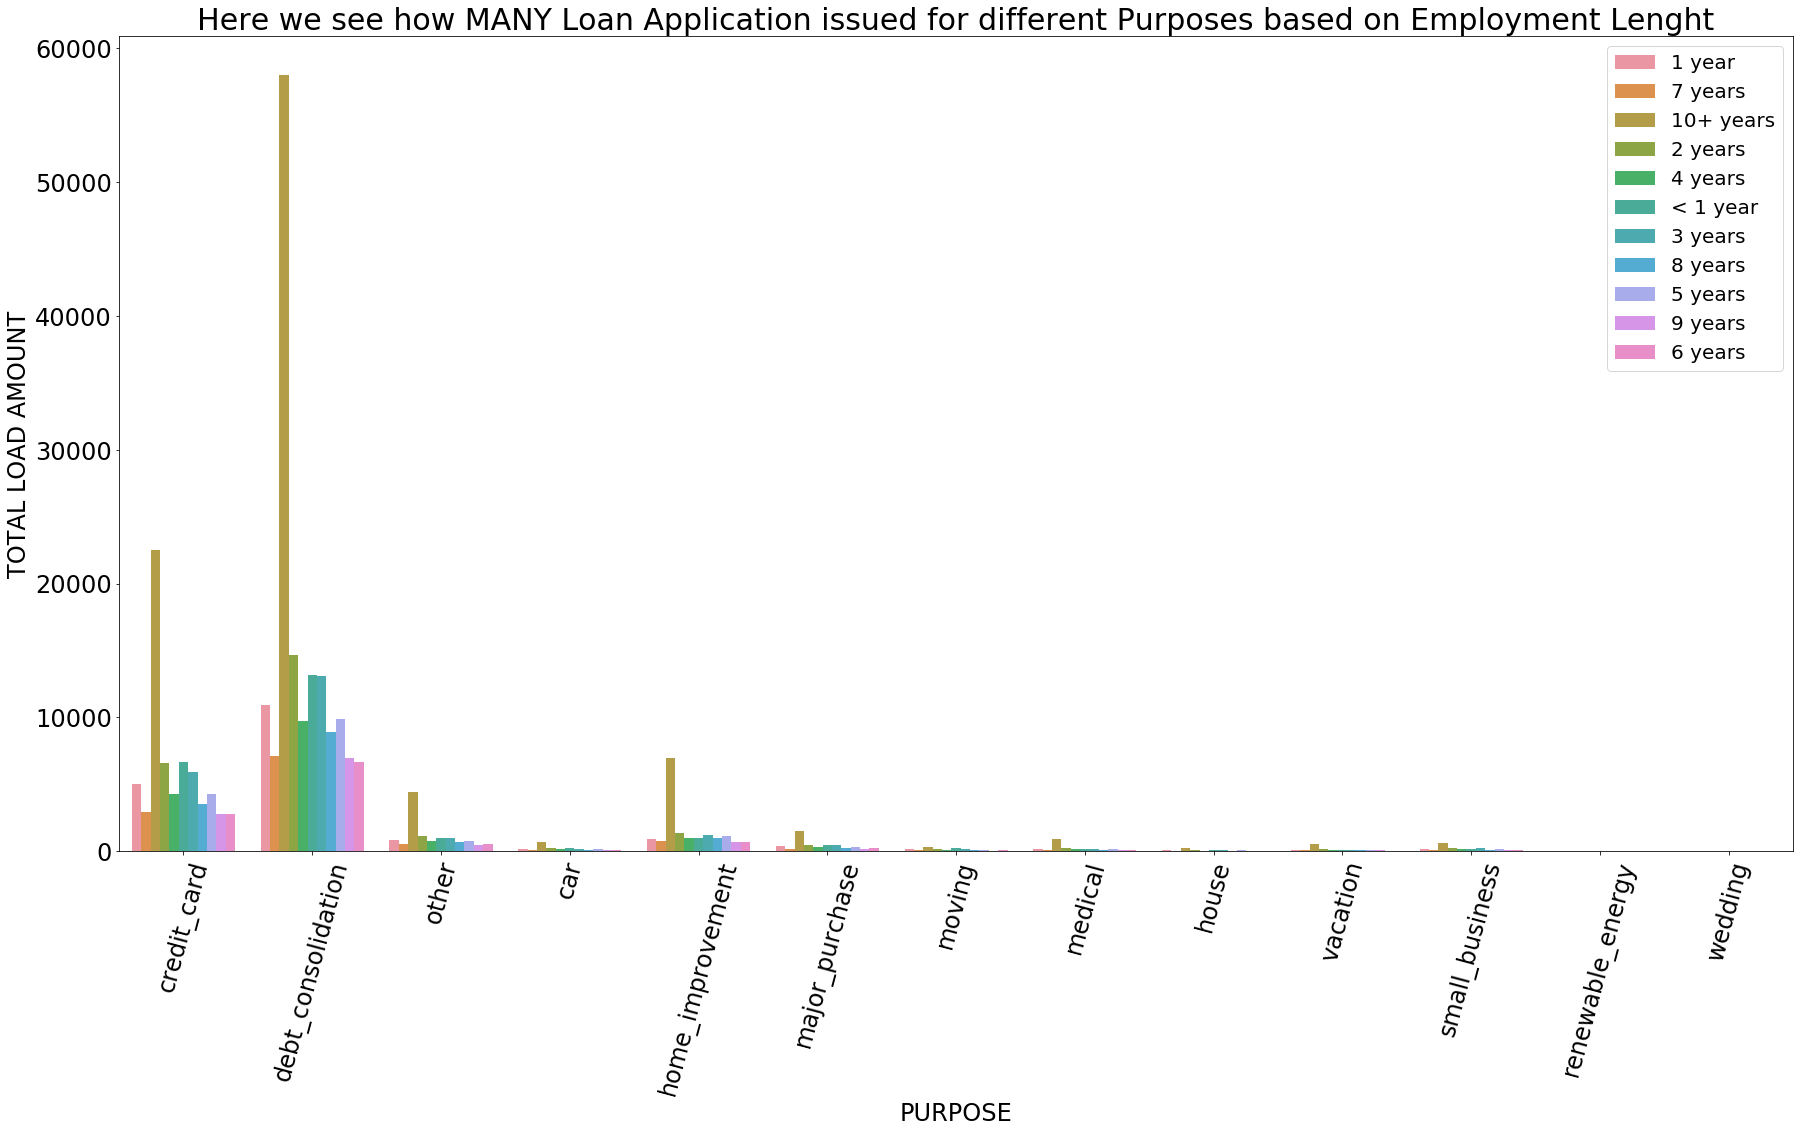

In [42]:
plt.figure(figsize=(30,15))
gp = sns.countplot(x='purpose', hue='emp_length',data=train_dataset)
gp.set_xticklabels(gp.get_xticklabels(), rotation=75, fontsize=20)
gp.set_title('Here we see how MANY Loan Application issued for different Purposes based on Employment Lenght', fontsize=30)
gp.set_xlabel('PURPOSE', fontsize=24)
gp.set_ylabel('TOTAL LOAD AMOUNT', fontsize=24)
plt.legend(fontsize=20, loc='upper right')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.show()

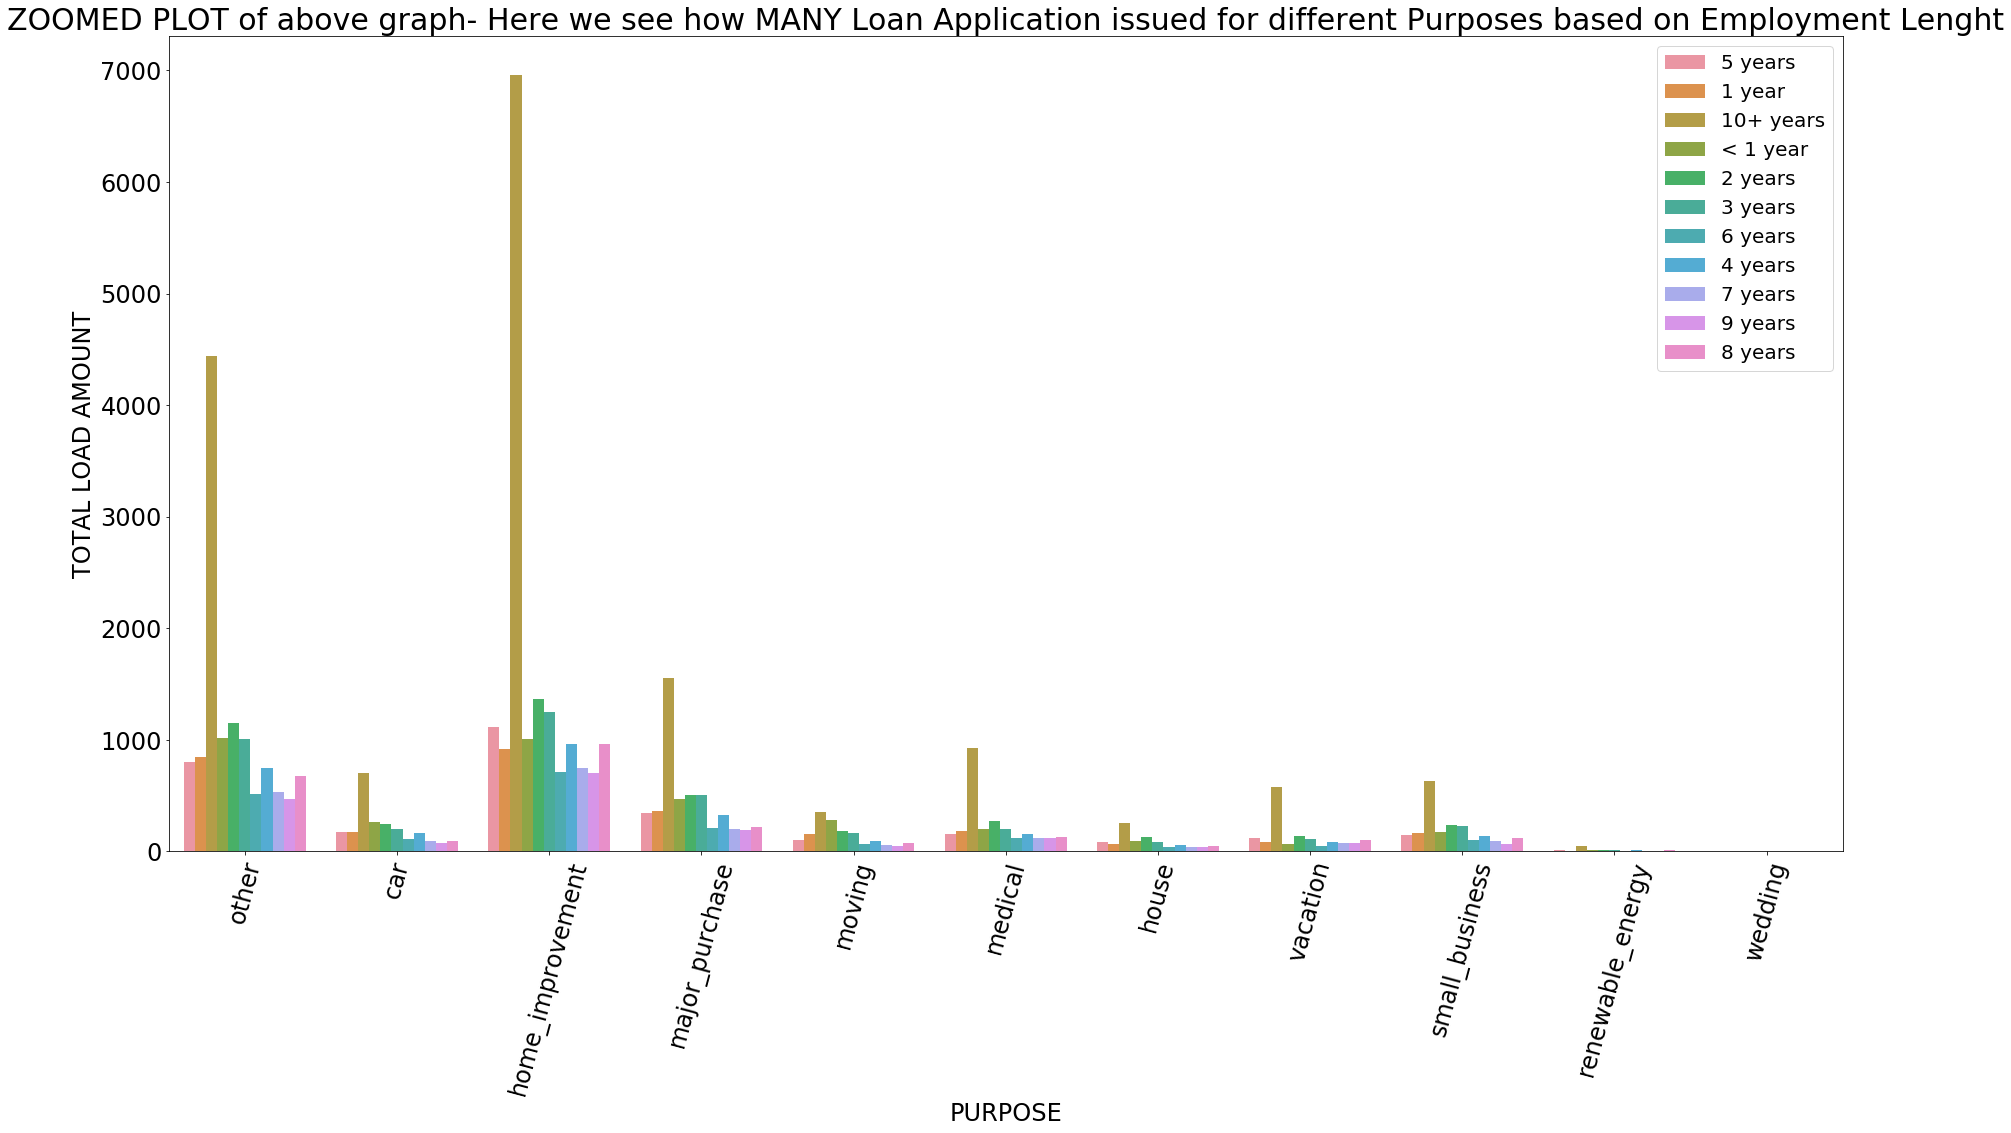

In [43]:
plt.figure(figsize=(30,15))
gp = sns.countplot(x='purpose', hue='emp_length',data=train_dataset[train_dataset['purpose'].apply(lambda x: x not in ['debt_consolidation', 'credit_card'])])
gp.set_xticklabels(gp.get_xticklabels(), rotation=75, fontsize=20)
gp.set_title('ZOOMED PLOT of above graph- Here we see how MANY Loan Application issued for different Purposes based on Employment Lenght', fontsize=30)
gp.set_xlabel('PURPOSE', fontsize=24)
gp.set_ylabel('TOTAL LOAD AMOUNT', fontsize=24)
plt.legend(fontsize=20, loc='upper right')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.show()

In [44]:
train_dataset[['purpose','emp_length']].groupby('purpose').count().sort_values('emp_length')

,emp_length
purpose,
wedding,2
renewable_energy,138
house,918
vacation,1461
moving,1572
small_business,2089
car,2291
medical,2583
major_purchase,4873


In [78]:
train_dataset.columns

Index(['addr_state', 'annual_inc', 'issue_d', 'application_type', 'dti',
       'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade',
       'home_ownership', 'id', 'initial_list_status', 'loan_amnt', 'member_id',
       'policy_code', 'pub_rec', 'purpose', 'sub_grade', 'term', 'title',
       'total_acc', 'total_pymnt', 'zip_code', 'verification_status',
       'default_ind'],
      dtype='object')

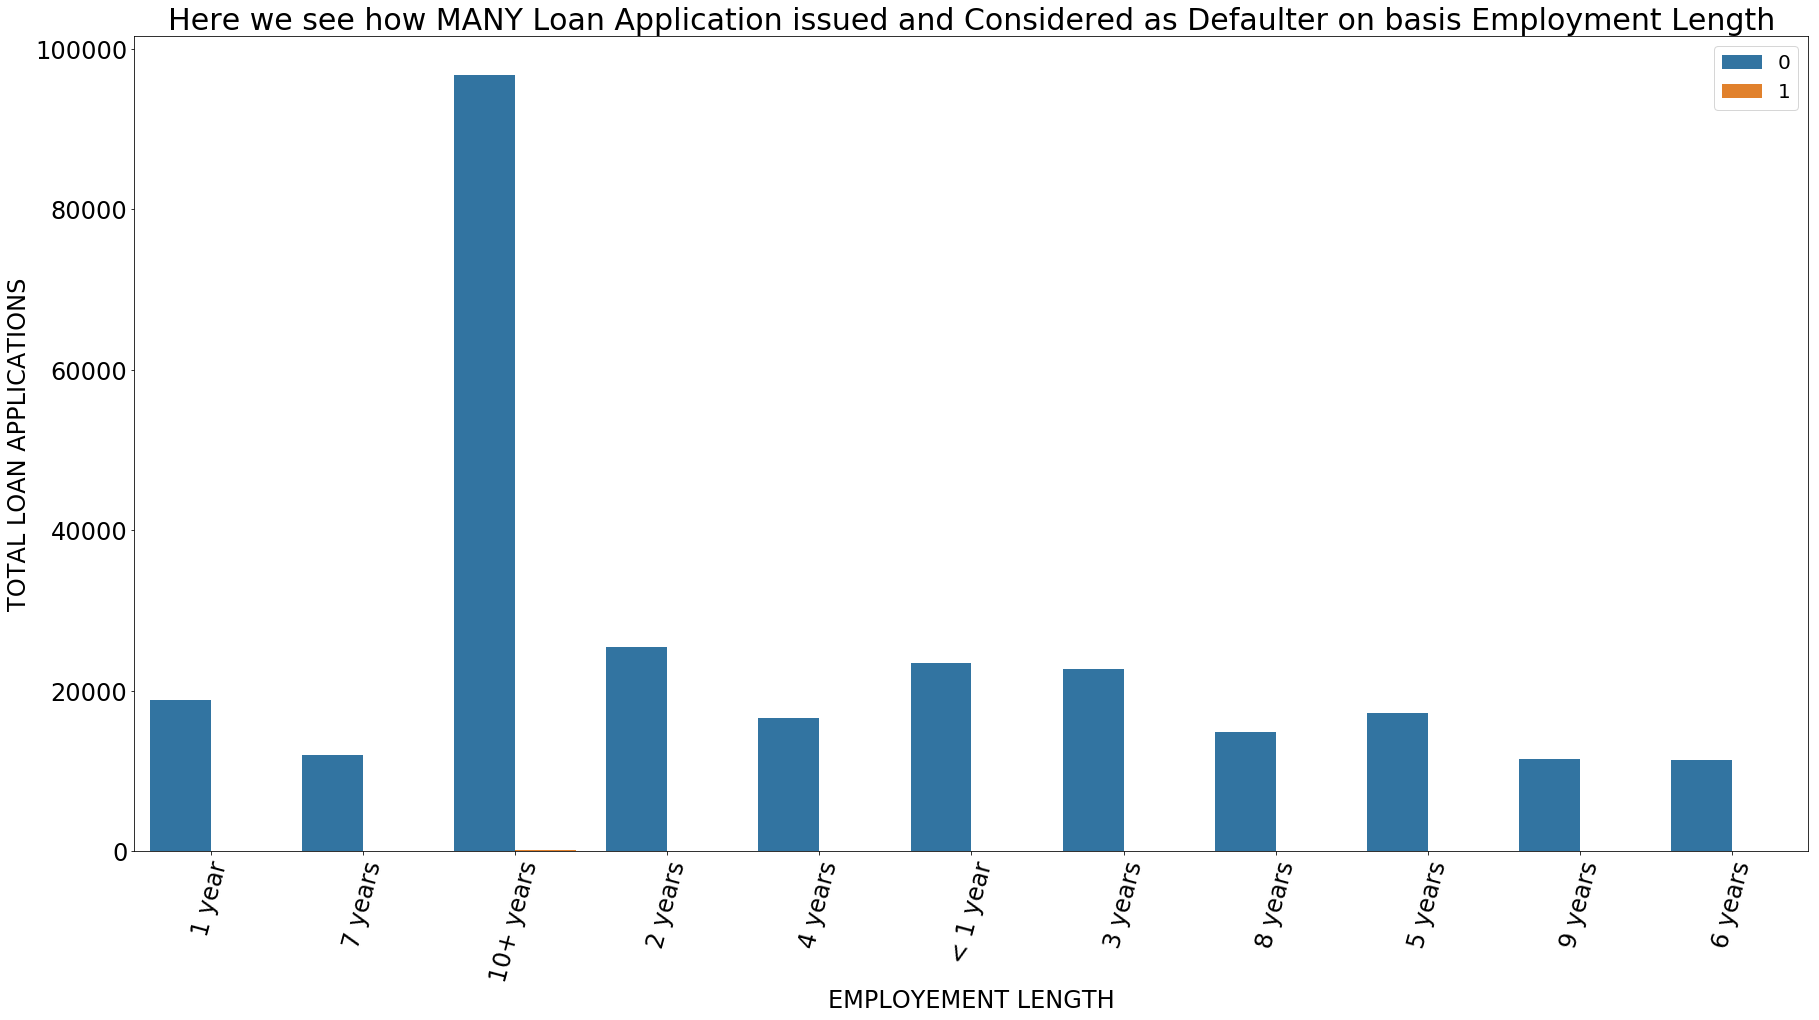

In [81]:
plt.figure(figsize=(30,15))
gp = sns.countplot(hue='default_ind', x='emp_length',data=train_dataset)
gp.set_xticklabels(gp.get_xticklabels(), rotation=75, fontsize=20)
gp.set_title('Here we see how MANY Loan Application issued and Considered as Defaulter on basis Employment Length', fontsize=30)
gp.set_xlabel('EMPLOYEMENT LENGTH', fontsize=24)
gp.set_ylabel('TOTAL LOAN APPLICATIONS', fontsize=24)
plt.legend(fontsize=20, loc='upper right')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.show()

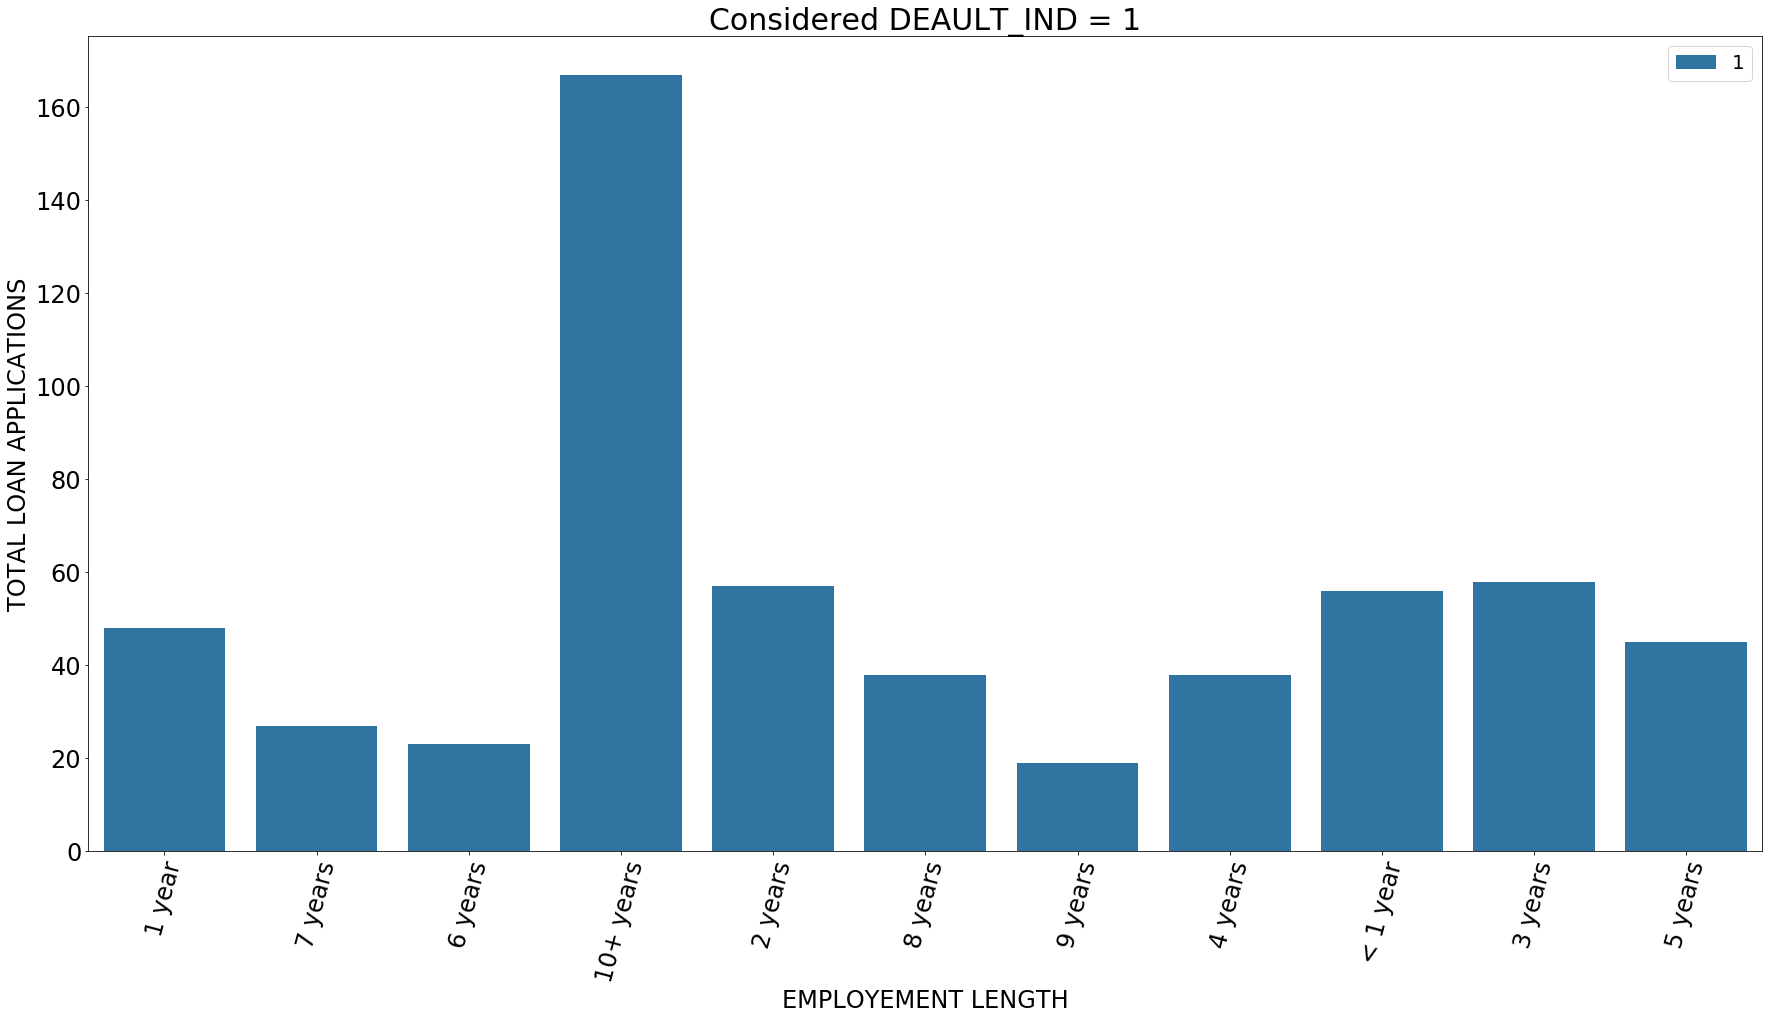

In [87]:
plt.figure(figsize=(30,15))
gp = sns.countplot(hue='default_ind', x='emp_length',data=train_dataset[train_dataset['default_ind'] == 1])
gp.set_xticklabels(gp.get_xticklabels(), rotation=75, fontsize=20)
gp.set_title('Considered DEAULT_IND = 1', fontsize=30)
gp.set_xlabel('EMPLOYEMENT LENGTH', fontsize=24)
gp.set_ylabel('TOTAL LOAN APPLICATIONS', fontsize=24)
plt.legend(fontsize=20, loc='upper right')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.show()

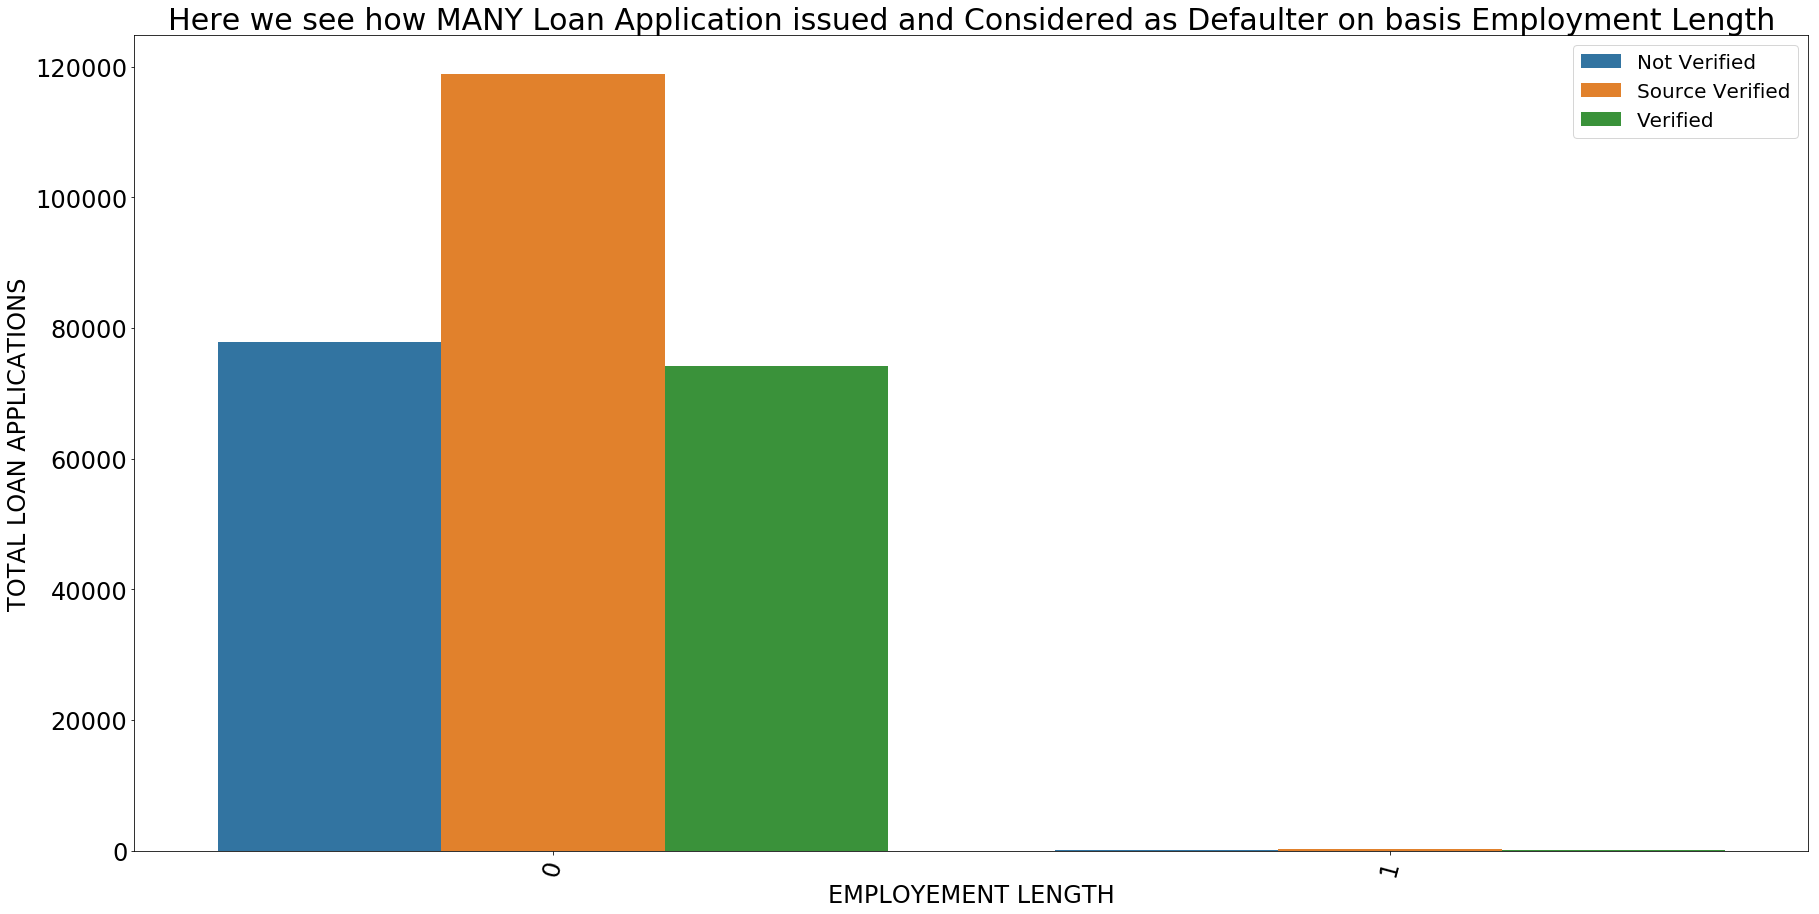

In [83]:
plt.figure(figsize=(30,15))
gp = sns.countplot(x='default_ind', hue='verification_status',data=train_dataset)
gp.set_xticklabels(gp.get_xticklabels(), rotation=75, fontsize=20)
gp.set_title('Here we see how MANY Loan Application issued and Considered as Defaulter on basis Employment Length', fontsize=30)
gp.set_xlabel('DEFAULT IND', fontsize=24)
gp.set_ylabel('TOTAL LOAN APPLICATIONS', fontsize=24)
plt.legend(fontsize=20, loc='upper right')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.show()

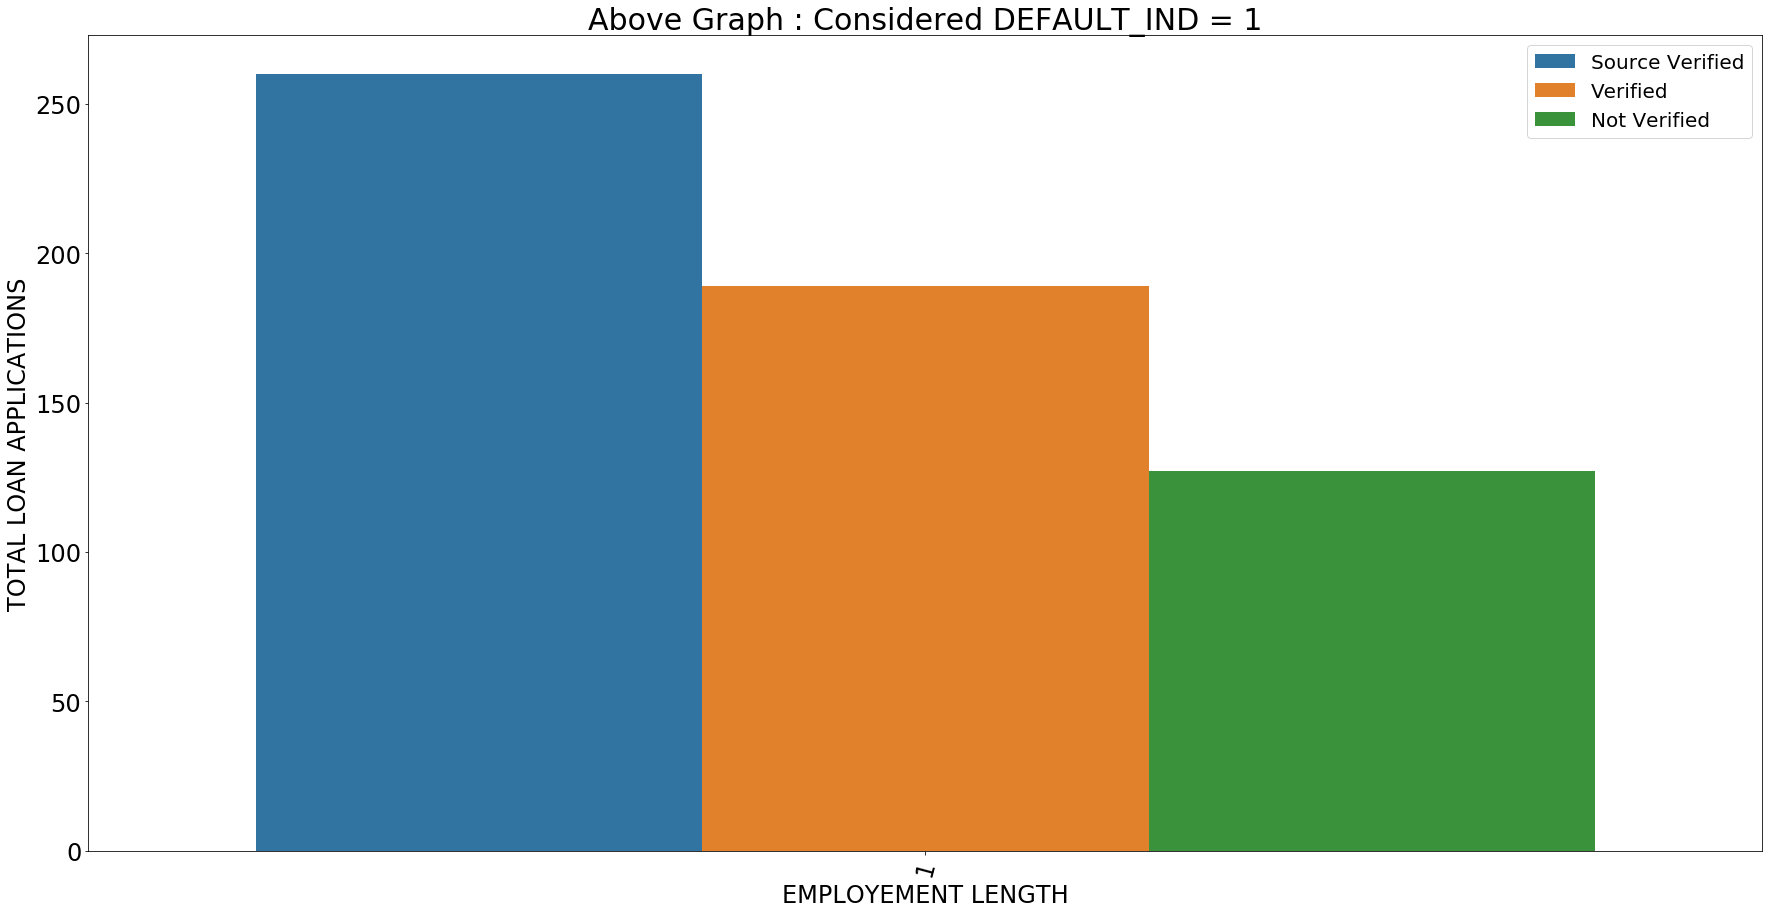

In [90]:
plt.figure(figsize=(30,15))
gp = sns.countplot(x='default_ind', hue='verification_status',data=train_dataset[train_dataset['default_ind'] == 1])
gp.set_xticklabels(gp.get_xticklabels(), rotation=75, fontsize=20)
gp.set_title('Above Graph : Considered DEFAULT_IND = 1', fontsize=30)
gp.set_xlabel('DEFAULT IND', fontsize=24)
gp.set_ylabel('TOTAL LOAN APPLICATIONS', fontsize=24)
plt.legend(fontsize=20, loc='upper right')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.show()